# Projeto Final - Aprendizado de Máquinas I
# PES 03 - Professor George Darmiton da Cunha Cavalcanti

## Michele Beatriz Lopes Farias
## Rafael Couto de Oliveira
---

# 0.0 Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from mlxtend.plotting import plot_decision_regions

# 1.0 Carregando dados

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data?select=train.csv


Ela classifica o preço de telefones celulares como: low cost, medium cost, high cost e very high cost de acordo com algumas características de cada aparelho

Dados disponiveis em duas amostras: Treino e teste..

In [3]:
df= pd.read_csv('train.csv')

teste = pd.read_csv('test.csv')

# 2.0 Pre processamento dos dados

## 2.1 Tamanho dos dados

In [4]:
print (f'Número de linhas: {df.shape[0]}')
print (f'Número de colunas: {df.shape[1]}')

Número de linhas: 2000
Número de colunas: 21


## 2.2 Data info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## 2.3 Verificação de valores nulos

In [7]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 2.4 Ajuste das colunas

### 2.4.2 Ajustando tipo das colunas

In [8]:
# Converter colunas para booleano
colunas_bool = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
df[colunas_bool] = df[colunas_bool].astype('boolean')

# Converter coluna 'price_range' para categoria
df['price_range'] = df['price_range'].astype('category')

## 2.6 Feature Engineering

In [9]:
df['camera_px'] =  df['fc'] + df['pc']

# 3.0 Descrição dos dados

In [10]:
# Ajustar a configuração de exibição para mostrar todas as colunas
pd.set_option('display.max_columns', None)
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,camera_px
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,14.226000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,9.463916
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,7.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,14.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,21.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,39.000000


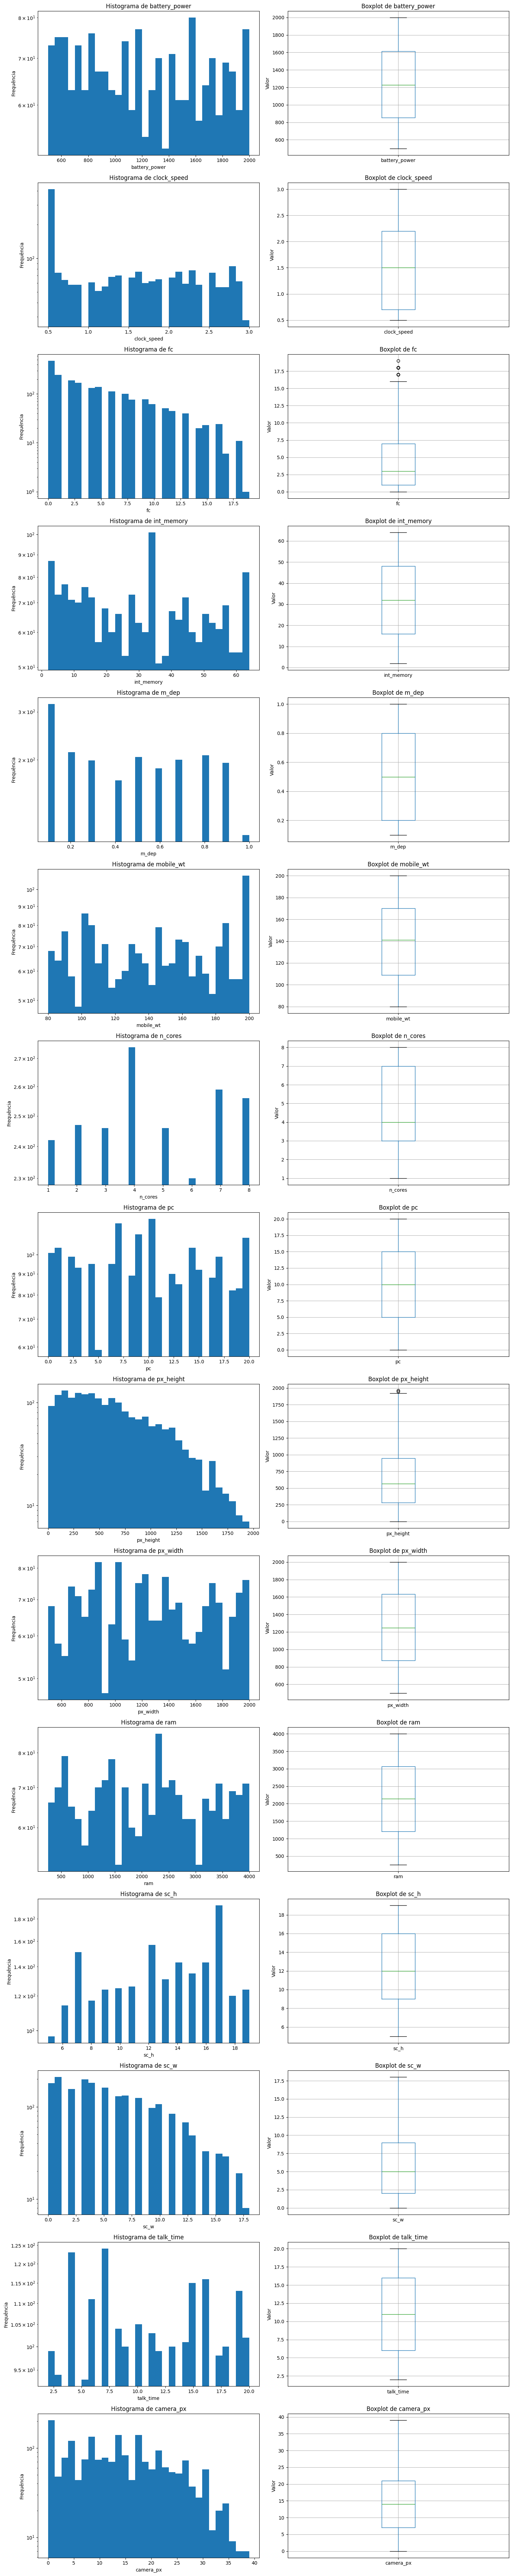

In [11]:
# Selecionando apenas as colunas numericas
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

#calculando numero de linhas do plot
nlinhas = len(colunas_numericas)

# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=nlinhas, ncols=2, figsize=(15, 5*nlinhas))


# Plotar um histograma e boxplot para cada coluna numérica
for i, col in enumerate(colunas_numericas):
    #plot do histograma
    ax_hist = axes[i, 0]
    df[col].plot(kind='hist', bins=30, ax=ax_hist, title=f'Histograma de {col}', log=True)
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Frequência')
    
    # Plotar o boxplot
    ax_box = axes[i, 1]
    df.boxplot(column=col, ax=ax_box)
    ax_box.set_title(f'Boxplot de {col}')
    ax_box.set_xlabel('')
    ax_box.set_ylabel('Valor')

# Ajustar o layout
plt.tight_layout()
plt.show()

## 3.2 Dados categóricos

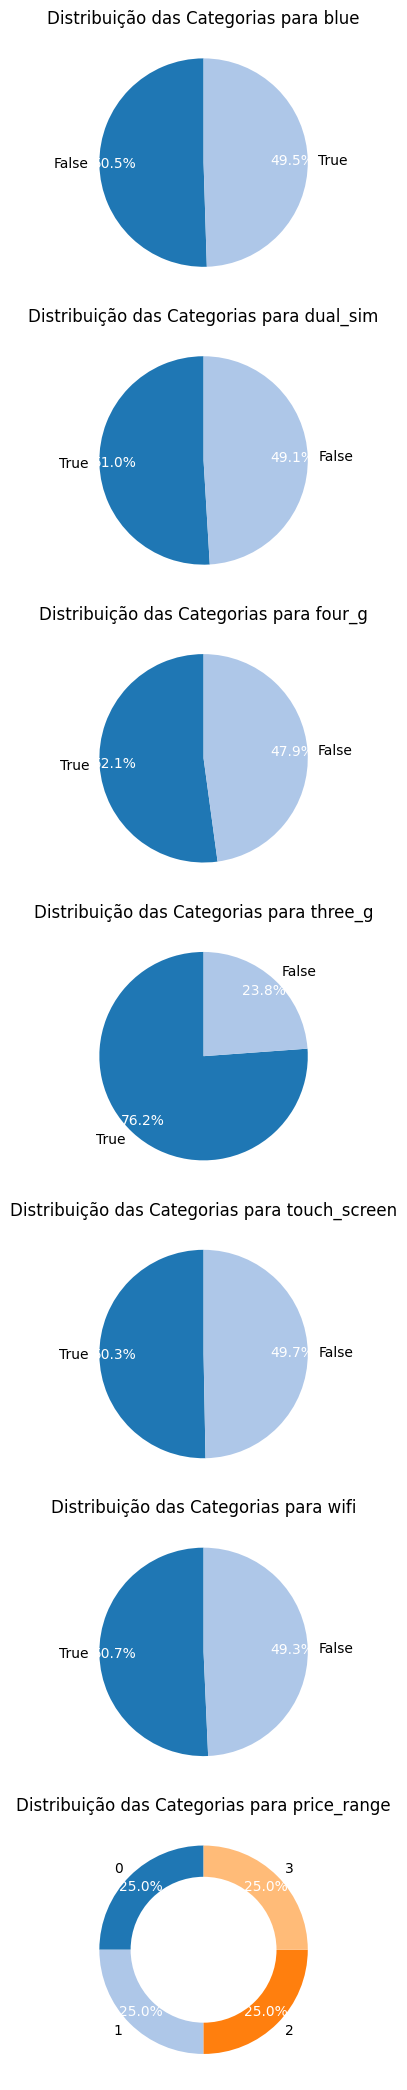

In [12]:
# Selecionando apenas as colunas categóricas
colunas_categoricas = df.select_dtypes(include=['bool', 'category']).columns.tolist()

#calculando numero de linhas do plot
nlinhas = len(colunas_categoricas)

# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=nlinhas, figsize=(10, 3*nlinhas))


# Plotar um gráfico de pizza para cada coluna categórica
for i, col in enumerate(colunas_categoricas):
    ax = axes[i]
    value_counts = df[col].value_counts()
    sizes = value_counts.values
    labels = value_counts.index

    # Gráfico de Pizza
    wedges, texts, autotexts = ax.pie(
        sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=90,
        pctdistance=0.85,
        colors=plt.get_cmap('tab20').colors  # Usando uma colormap para cores variadas
    )

    # Adicionar valores diretamente nas fatias
    for text in autotexts:
        text.set_color('white')

    # Adicionar um círculo branco no centro para um visual de donut
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax.set_title(f'Distribuição das Categorias para {col}')

# Ajustar o layout
plt.tight_layout()
plt.show()

## 3.3  Correlação entre os dados

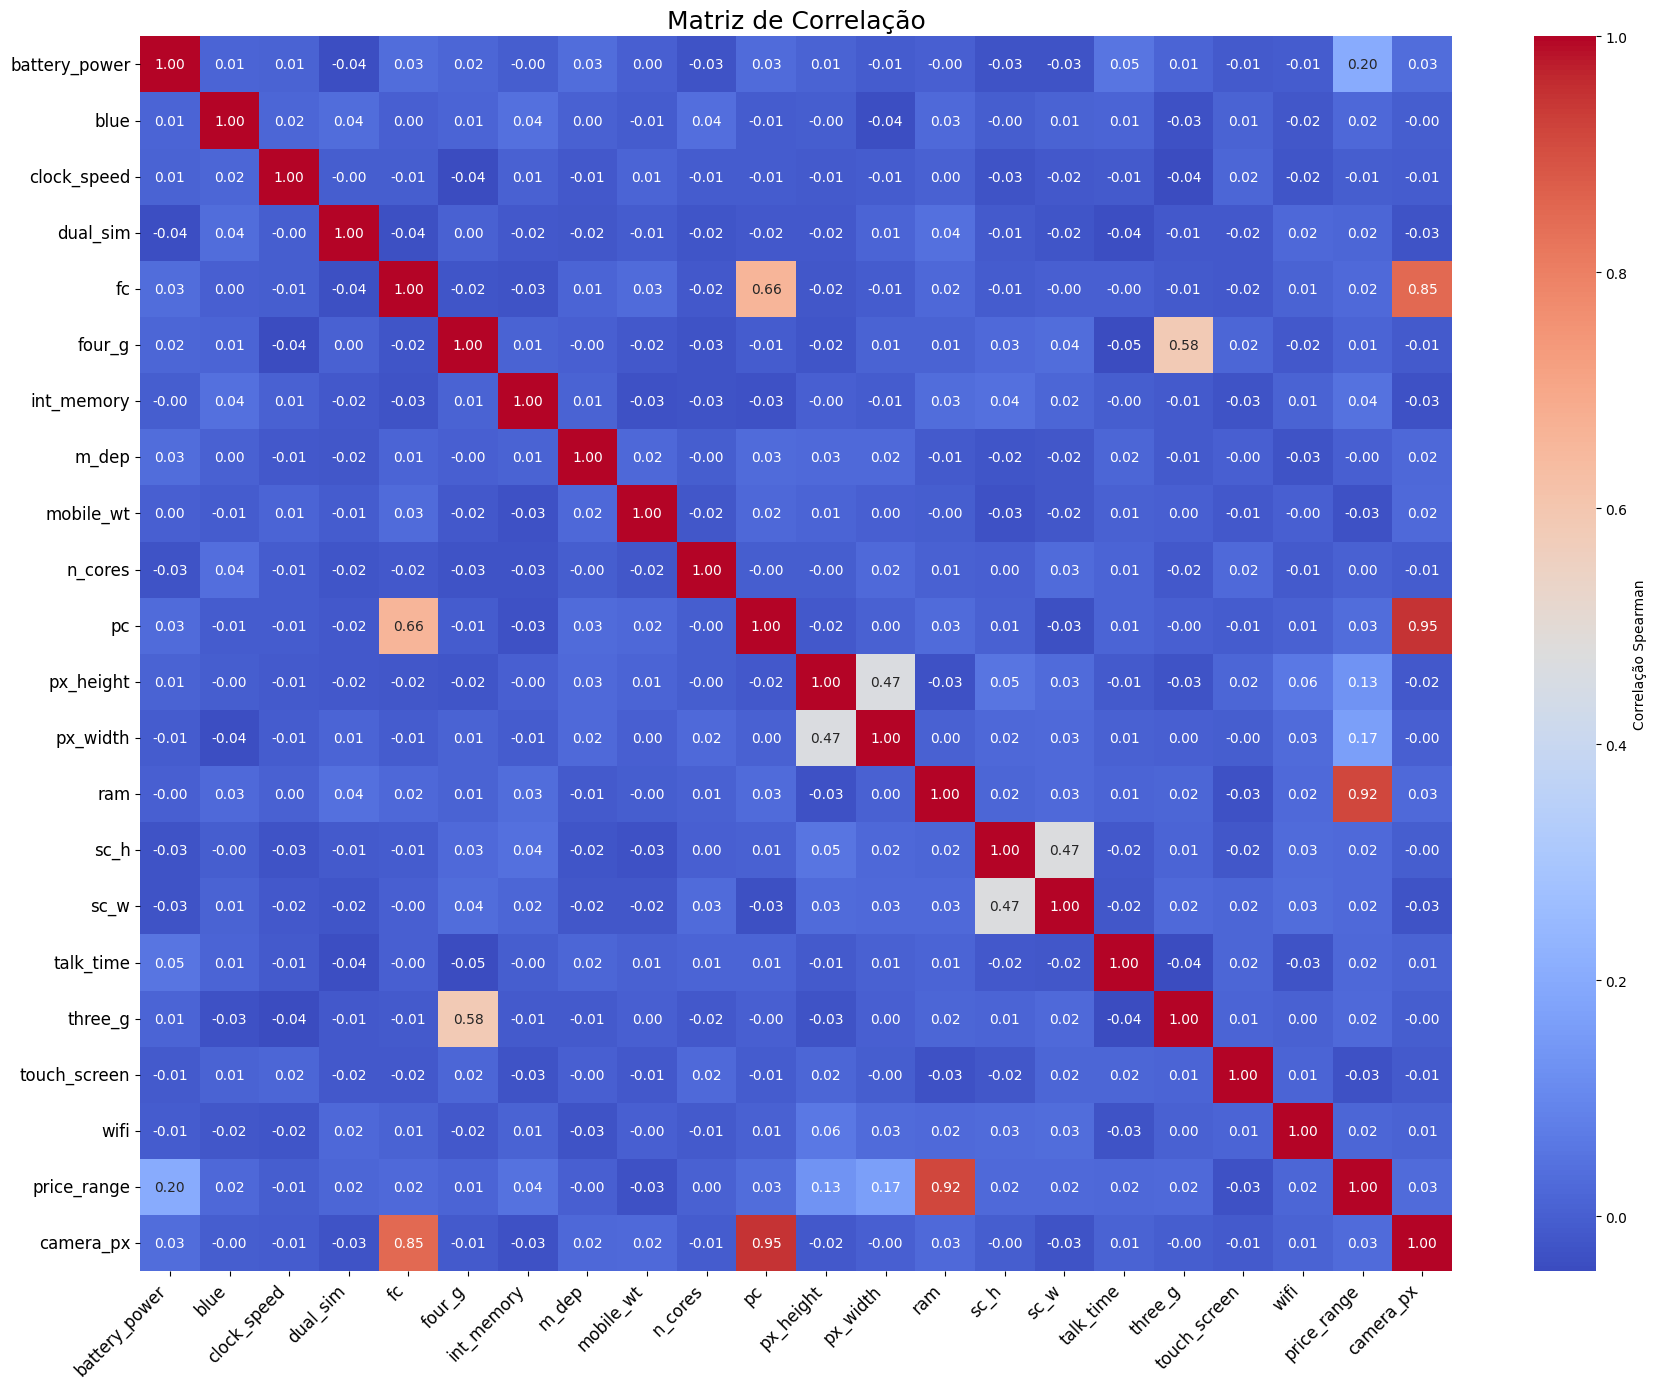

In [13]:
# Calculando a matriz de correlação
correlation_matrix = df.corr(method='spearman')

# Plotando a matriz de correlação com ajustes
plt.figure(figsize=(18, 14))  # Aumentar o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            annot_kws={"size": 10},  # Ajustar o tamanho do texto das anotações
            cbar_kws={'label': 'Correlação Spearman'})  # Legenda da barra de cores
plt.title('Matriz de Correlação', fontsize=18)  # Aumentar o tamanho do título
plt.xticks(rotation=45, ha='right', fontsize=12)  # Ajustar a rotação e o tamanho dos rótulos do eixo x
plt.yticks(rotation=0, fontsize=12)  # Ajustar a rotação e o tamanho dos rótulos do eixo y
plt.tight_layout()  # Ajustar layout para melhor visualização
plt.show()

## 3.4  Distribuição por target



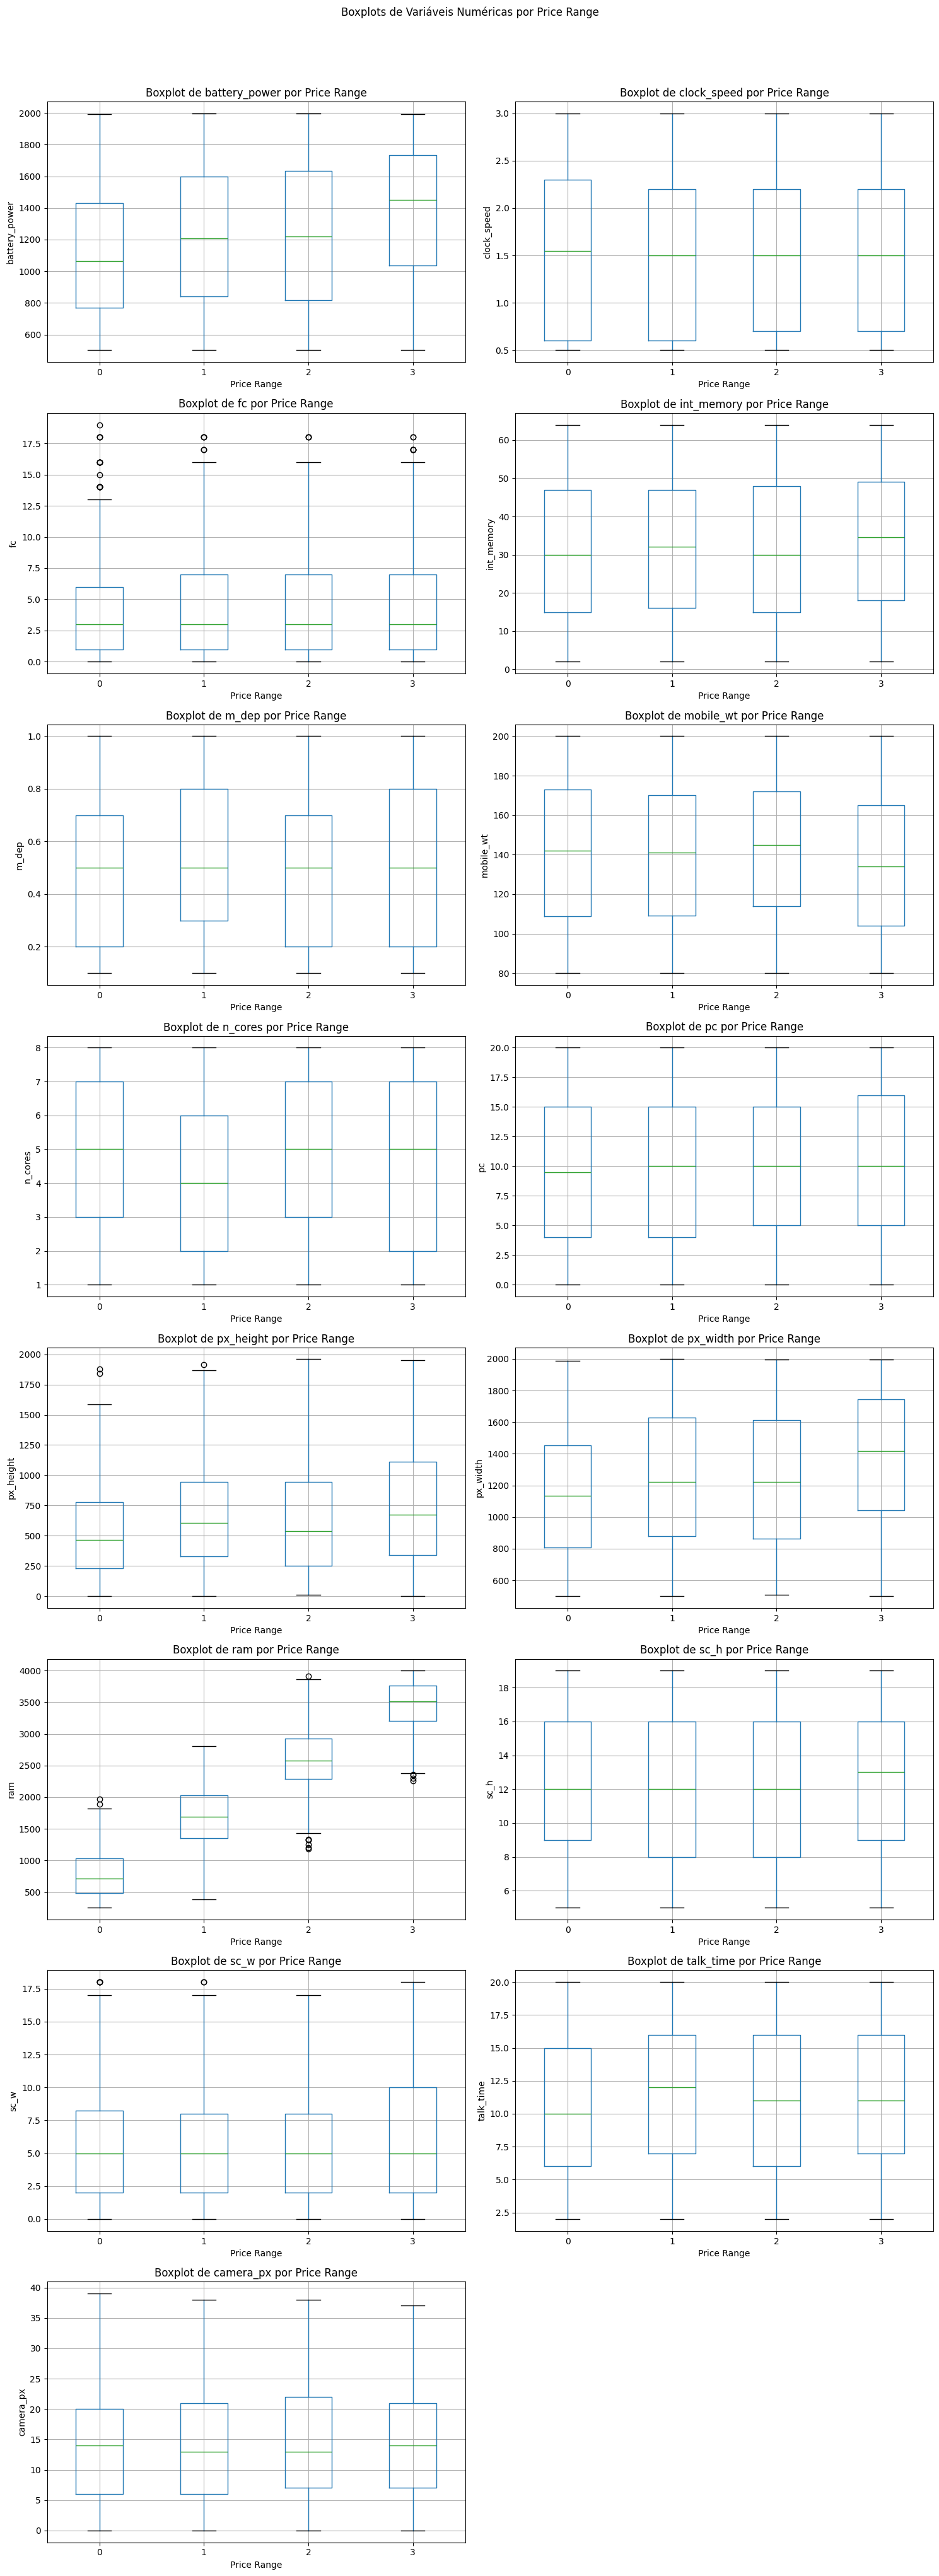

In [14]:
## plotar boxplot dos 4 targets por coluna
# Selecionar apenas as colunas numéricas (excluindo 'price_range')
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Calculando o número de linhas para o grid de subplots
nlinhas = len(colunas_numericas)

# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=(nlinhas+1) // 2, ncols=2, figsize=(15, 5 * ((nlinhas + 1) // 2)))

# Achatar o array de eixos para fácil iteração
axes = axes.flatten() if nlinhas > 1 else [axes]

# Plotar um boxplot para cada variável numérica
for i, col in enumerate(colunas_numericas):
    ax = axes[i]
    df.boxplot(column=col, by='price_range', ax=ax)
    ax.set_title(f'Boxplot de {col} por Price Range')
    ax.set_xlabel('Price Range')
    ax.set_ylabel(col)

# Remover os subplots não utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout
plt.suptitle('Boxplots de Variáveis Numéricas por Price Range', y=1.02)
plt.tight_layout()
plt.show()

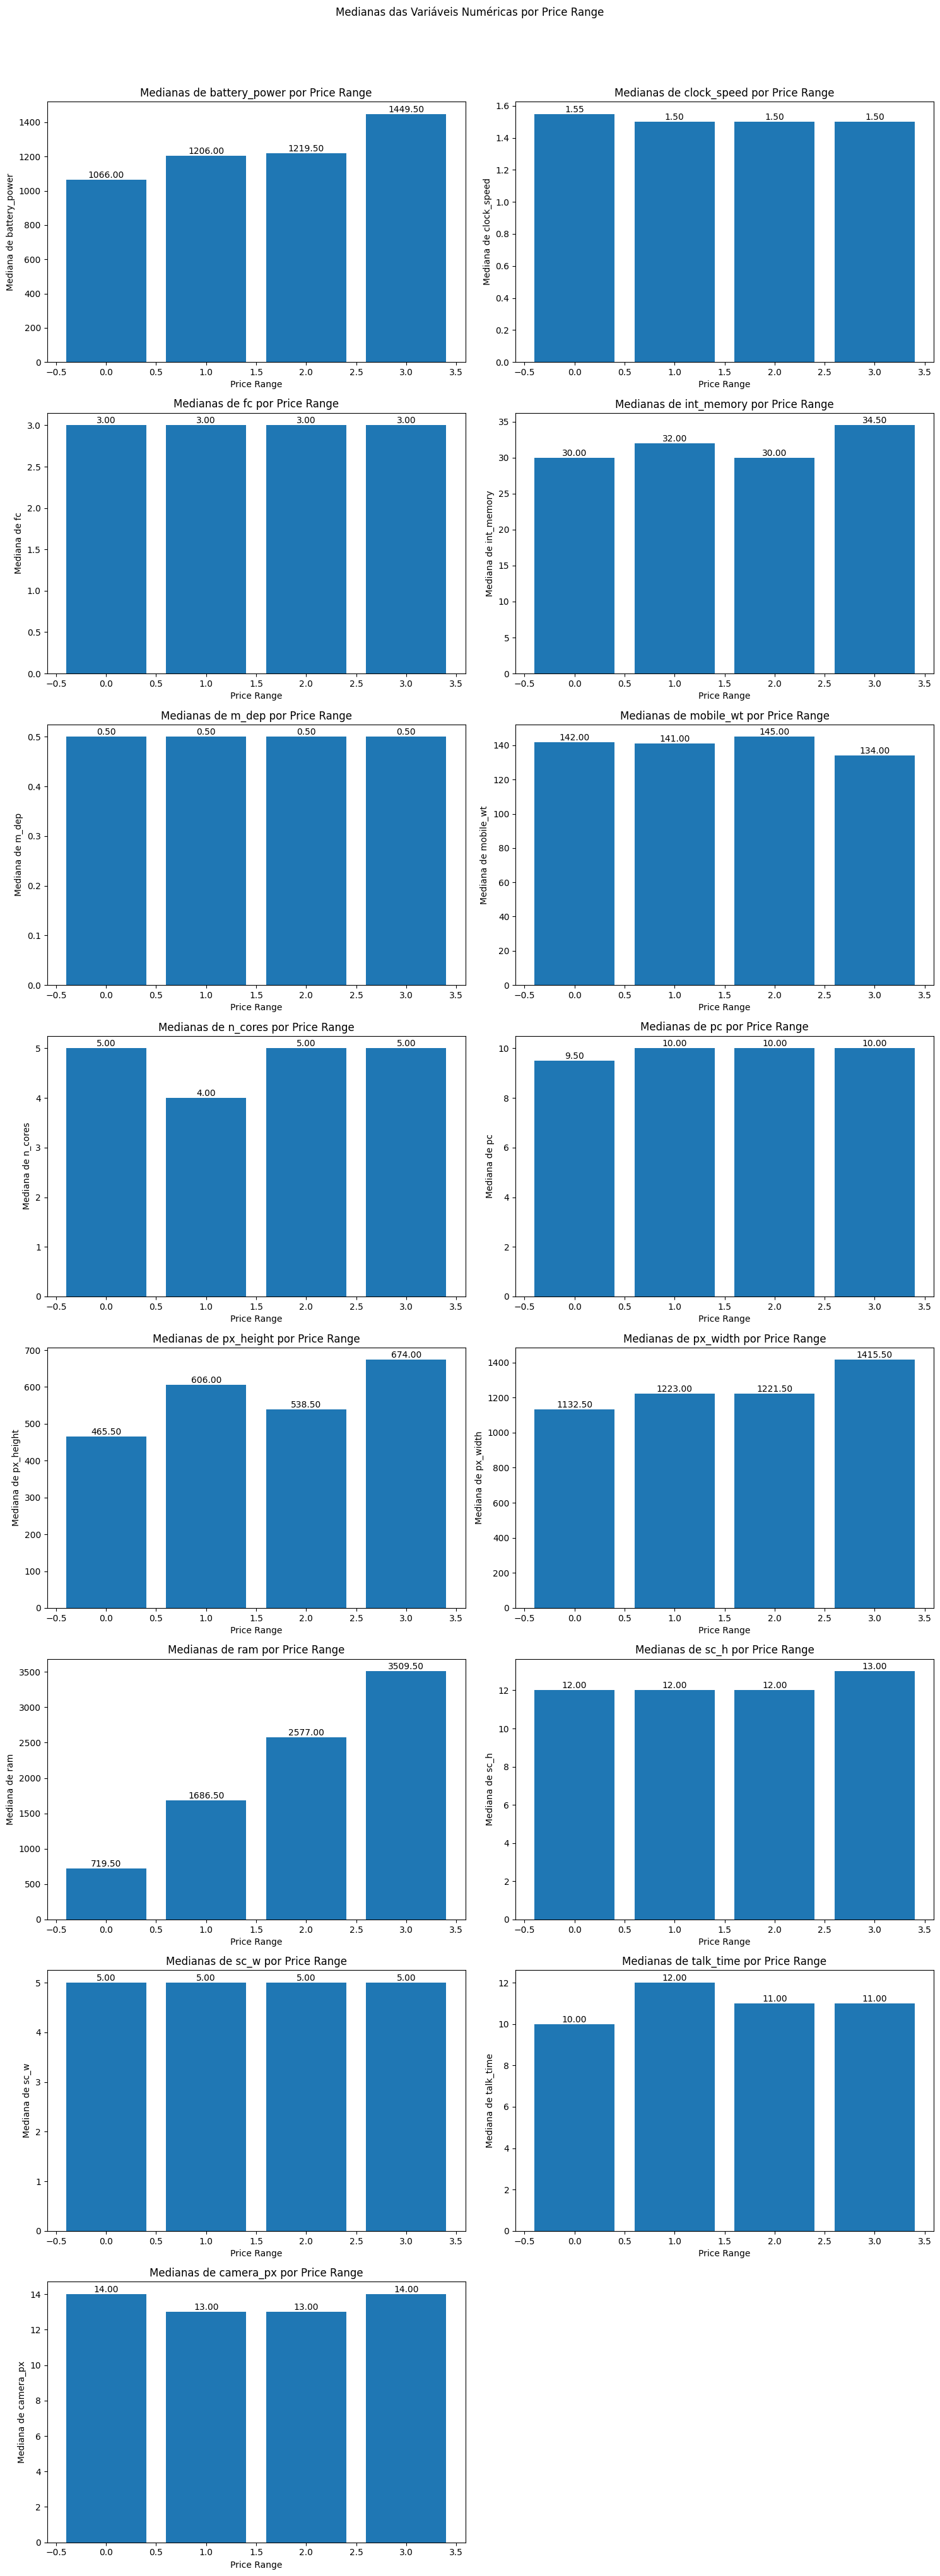

In [15]:
# Configurar o layout dos subplots
fig, axes = plt.subplots(nrows=(nlinhas + 1) // 2, ncols=2, figsize=(15, 5 * ((nlinhas + 1) // 2)))

# Achatar o array de eixos para fácil iteração
axes = axes.flatten() if nlinhas > 1 else [axes]

# Plotar gráficos de barras para as medianas de cada variável numérica
for i, col in enumerate(colunas_numericas):
    ax = axes[i]
    
    # Calcular medianas por price_range
    medians = df.groupby('price_range', observed=False)[col].median().reset_index()
    
    # Plotar gráfico de barras
    ax.bar(medians['price_range'], medians[col])
    ax.set_title(f'Medianas de {col} por Price Range')
    ax.set_xlabel('Price Range')
    ax.set_ylabel(f'Mediana de {col}')
    
    # Adicionar valores nas barras
    for j, value in enumerate(medians[col]):
        ax.text(j, value, f'{value:.2f}', ha='center', va='bottom')

# Remover os subplots não utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout
plt.suptitle('Medianas das Variáveis Numéricas por Price Range', y=1.02)
plt.tight_layout()
plt.show()

# 4.0 Preparação dos dados

In [16]:
df1 = df.copy()

## 4.1 Rescaling

In [17]:
df1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'camera_px'],
      dtype='object')

In [18]:
rs = RobustScaler()
mms = MinMaxScaler()

# Para variáveis que apresentaram outliers vamos usar o RobustScaler
df1['fc'] = rs.fit_transform( df1[['fc']].values )
df1['px_height'	] = rs.fit_transform( df1[['px_height'	]].values )

# Para variáveis que não apresentaram outliers vamos usar o MinMacscaler
df1['battery_power'] = mms.fit_transform( df1[['battery_power']].values )
df1['clock_speed'] = mms.fit_transform(df1[['clock_speed']].values)
df1['int_memory'] = mms.fit_transform(df1[['int_memory']].values)
df1['m_dep'] = mms.fit_transform(df1[['m_dep']].values)
df1['mobile_wt'] = mms.fit_transform(df1[['mobile_wt']].values)
df1['n_cores'] = mms.fit_transform(df1[['n_cores']].values)
df1['pc'] = mms.fit_transform(df1[['pc']].values)
df1['px_width'] = mms.fit_transform(df1[['px_width']].values)
df1['ram'] = mms.fit_transform(df1[['ram']].values)
df1['sc_h'] = mms.fit_transform(df1[['sc_h']].values)
df1['sc_w'] = mms.fit_transform(df1[['sc_w']].values)
df1['talk_time'] = mms.fit_transform(df1[['talk_time']].values)
df1['camera_px'] = mms.fit_transform(df1[['camera_px']].values)



In [19]:
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,camera_px
0,0.227789,False,0.68,False,-0.333333,False,0.080645,0.555556,0.900000,0.142857,0.10,-0.818661,0.170895,0.612774,0.285714,0.388889,0.944444,False,False,True,1,0.076923
1,0.347361,True,0.00,True,-0.500000,True,0.822581,0.666667,0.466667,0.285714,0.30,0.513168,0.993324,0.634687,0.857143,0.166667,0.277778,True,True,False,2,0.153846
2,0.041416,True,0.00,True,-0.166667,True,0.629032,0.888889,0.541667,0.571429,0.30,1.051919,0.811749,0.627205,0.428571,0.111111,0.388889,True,True,False,2,0.205128
3,0.076152,True,0.80,False,-0.500000,False,0.129032,0.777778,0.425000,0.714286,0.45,0.981189,0.858478,0.671566,0.785714,0.444444,0.500000,True,False,False,2,0.230769
4,0.881764,True,0.28,False,1.666667,True,0.677419,0.555556,0.508333,0.142857,0.70,0.969150,0.475300,0.308658,0.214286,0.111111,0.722222,True,True,False,1,0.692308


# 5.0 Feature Selection

## 5.1 Eliminando variaveis sem muita correlação com a variavel resposta

In [20]:
df2 = df1[['battery_power', 'int_memory','mobile_wt','pc', 'px_height', 'px_width', 'ram','touch_screen','sc_w','price_range','camera_px']]

## 5.2 Definição das variaveis X e y

In [21]:
# Armazenando a variável alvoem X e os atributos em y
X = df2.drop('price_range', axis=1)
y = df2['price_range']

# Configurar KFold para 10 folds
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

## 5.3 Definindo dados de treino e teste

In [22]:
#Separando o conjunto de dados em treino+valição e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df2['price_range'])


# 6.0 Machine Learning Modelling

In [76]:
def ml_fit(model, param_grid):
    # Armazenar os resultados
    results = []
    
    # Configurar o GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold, n_jobs=-1)
    
    # Ajustar o modelo usando GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Iterar por todas as combinações de parâmetros testadas
    for i in range(len(grid_search.cv_results_['params'])):
        params = grid_search.cv_results_['params'][i]
        
        # Armazenar as métricas para cada combinação de parâmetros
        roc_auc_scores = []
        f1_scores = []
        accuracy_scores = []
        conf_matrices = []
        
        # Validar cruzado e calcular as métricas
        for train_index, test_index in kfold.split(X_train, y_train):
            X_training, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
            y_training, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
            
            model.set_params(**params)
            model.fit(X_training, y_training)
            y_pred = model.predict(X_val)
            y_proba = model.predict_proba(X_val)
            
            # Binarizar as classes
            y_val_bin = label_binarize(y_val, classes=np.unique(y))
            
            # Garantir que y_proba tenha a forma correta
            if y_proba.ndim == 1:
                # Se y_proba é unidimensional, binarizar manualmente
                y_proba_bin = np.vstack([1 - y_proba, y_proba]).T
            else:
                y_proba_bin = y_proba
            
            # Calcular o ROC AUC para problemas multiclasse
            roc_auc_scores.append(roc_auc_score(y_val_bin, y_proba_bin, average='macro', multi_class='ovr'))
            f1_scores.append(f1_score(y_val, y_pred, average='weighted'))
            accuracy_scores.append(accuracy_score(y_val, y_pred))
            conf_matrices.append(confusion_matrix(y_val, y_pred))

        # Calcular a média e o desvio padrão das métricas
        mean_roc_auc = np.mean(roc_auc_scores)
        std_roc_auc = np.std(roc_auc_scores)
        mean_f1 = np.mean(f1_scores)
        std_f1 = np.std(f1_scores)
        mean_accuracy = np.mean(accuracy_scores)
        std_accuracy = np.std(accuracy_scores)
        
        # Adicionar resultados à lista
        results.append({
            'Params': params,
            'Mean ROC AUC': mean_roc_auc,
            'Std ROC AUC': std_roc_auc,
            'Mean F1 Score': mean_f1,
            'Std F1 Score': std_f1,
            'Mean Accuracy': mean_accuracy,
            'Std Accuracy': std_accuracy
        })
    # Calcular a soma da Acurácia e ROC AUC
    for result in results:
        result['Accuracy + ROC AUC'] = result['Mean Accuracy'] + result['Mean ROC AUC']

    # Encontrar o resultado com a maior soma
    best_result = max(results, key=lambda x: x['Accuracy + ROC AUC'])
    best_params = best_result['Params']
    best_value = best_result['Accuracy + ROC AUC']
    
    return results, best_params, best_value

## 6.1 KNN model

In [68]:
# Armazenar resultados
results = []
# Definir o modelo
knn = KNeighborsClassifier()

# Definir o grid de parâmetros a ser testado
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13,14, 15,16, 17, 19, 21,50,100,200],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
}

# Chamar a função ml_fit
results, best_params, best_value = ml_fit(knn, param_grid)

results_knn = pd.DataFrame(results)
results_knn

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy,Accuracy + ROC AUC
0,"{'metric': 'euclidean', 'n_neighbors': 3}",0.820867,0.021923,0.583171,0.039162,0.580000,0.039111,1.400867
1,"{'metric': 'euclidean', 'n_neighbors': 5}",0.845166,0.017325,0.618228,0.036450,0.613750,0.038099,1.458916
2,"{'metric': 'euclidean', 'n_neighbors': 7}",0.852568,0.012976,0.626973,0.025164,0.623750,0.026634,1.476318
3,"{'metric': 'euclidean', 'n_neighbors': 9}",0.854684,0.012482,0.635786,0.027792,0.633125,0.027958,1.487809
4,"{'metric': 'euclidean', 'n_neighbors': 11}",0.852899,0.010018,0.628078,0.018725,0.624375,0.019655,1.477274
5,"{'metric': 'euclidean', 'n_neighbors': 13}",0.856129,0.009148,0.629479,0.021316,0.626250,0.024012,1.482379
6,"{'metric': 'euclidean', 'n_neighbors': 14}",0.858447,0.010765,0.639644,0.022912,0.637500,0.023552,1.495947
7,"{'metric': 'euclidean', 'n_neighbors': 15}",0.859779,0.013043,0.637243,0.027921,0.633750,0.029208,1.493529
8,"{'metric': 'euclidean', 'n_neighbors': 16}",0.859457,0.013464,0.637640,0.038433,0.634375,0.037422,1.493832
9,"{'metric': 'euclidean', 'n_neighbors': 17}",0.860907,0.012543,0.641813,0.031803,0.638750,0.032572,1.499657


In [69]:
print(f'Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {best_params}, com o resultado de {best_value}')

Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {'metric': 'manhattan', 'n_neighbors': 50}, com o resultado de 1.6672559634751556


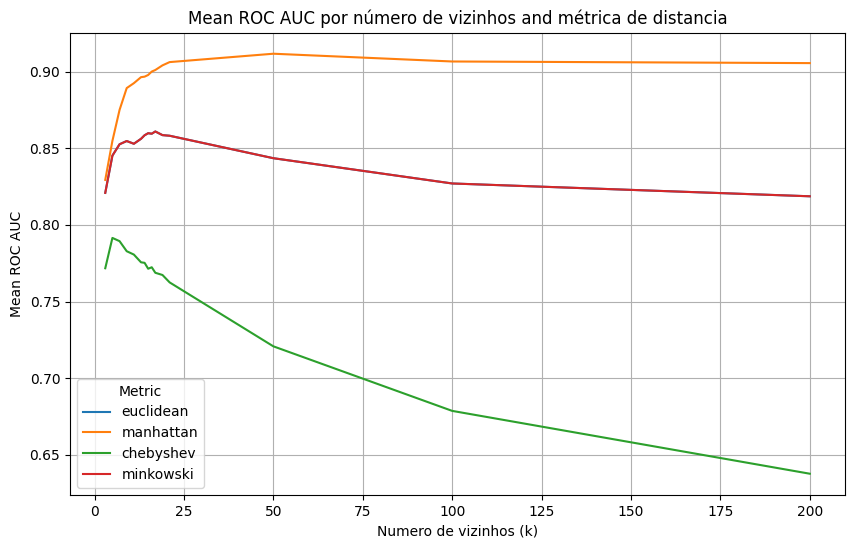

In [70]:

# Add columns for metric and n_neighbors
results_knn['metric'] = results_knn['Params'].apply(lambda x: x['metric'])
results_knn['n_neighbors'] = results_knn['Params'].apply(lambda x: x['n_neighbors'])

# Plotting
plt.figure(figsize=(10, 6))

for metric in results_knn['metric'].unique():
subset = results_knn[results_knn['metric'] == metric]
plt.plot(subset['n_neighbors'], subset['Mean ROC AUC'], label=metric)

plt.xlabel('Numero de vizinhos (k)')
plt.ylabel('Mean ROC AUC')
plt.title('Mean ROC AUC por número de vizinhos and métrica de distancia')
plt.legend(title='Metric')
plt.grid(True)
plt.show()

Vemos que a metrica de distancia que apresenta melhor resultado é a manhattan e que o melhor número de vizinhos está próximo de 50.

In [74]:
# Armazenar resultados
results = []
# Definir o modelo
knn = KNeighborsClassifier()

# Definir o grid de parâmetros a ser testado
param_grid = {
    'n_neighbors': [30,35,38,39,40,41,42,45,50,55,60],
    'metric': ['manhattan'],
}

# Chamar a função ml_fit
results, best_params, best_value = ml_fit(knn, param_grid)

results_knn = pd.DataFrame(results)
results_knn

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy,Accuracy + ROC AUC
0,"{'metric': 'manhattan', 'n_neighbors': 30}",0.911065,0.006071,0.729271,0.018971,0.728750,0.020000,1.639815
1,"{'metric': 'manhattan', 'n_neighbors': 35}",0.911272,0.005553,0.738956,0.026854,0.738125,0.028014,1.649397
2,"{'metric': 'manhattan', 'n_neighbors': 38}",0.913605,0.005825,0.758050,0.038210,0.757500,0.037583,1.671105
3,"{'metric': 'manhattan', 'n_neighbors': 39}",0.913439,0.006608,0.750970,0.039236,0.750000,0.038931,1.663439
4,"{'metric': 'manhattan', 'n_neighbors': 40}",0.914034,0.007290,0.748633,0.027927,0.748125,0.027393,1.662159
5,"{'metric': 'manhattan', 'n_neighbors': 41}",0.913600,0.006740,0.749927,0.022375,0.749375,0.022088,1.662975
6,"{'metric': 'manhattan', 'n_neighbors': 42}",0.913853,0.007940,0.752950,0.031070,0.751875,0.030879,1.665728
7,"{'metric': 'manhattan', 'n_neighbors': 45}",0.913729,0.007184,0.749432,0.022787,0.748750,0.022500,1.662479
8,"{'metric': 'manhattan', 'n_neighbors': 50}",0.911631,0.009306,0.756839,0.027566,0.755625,0.027450,1.667256
9,"{'metric': 'manhattan', 'n_neighbors': 55}",0.910969,0.008719,0.752447,0.036691,0.751250,0.037165,1.662219


In [72]:
print(f'Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {best_params}, com o resultado de {best_value}')

Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {'metric': 'manhattan', 'n_neighbors': 38}, com o resultado de 1.671104630282116


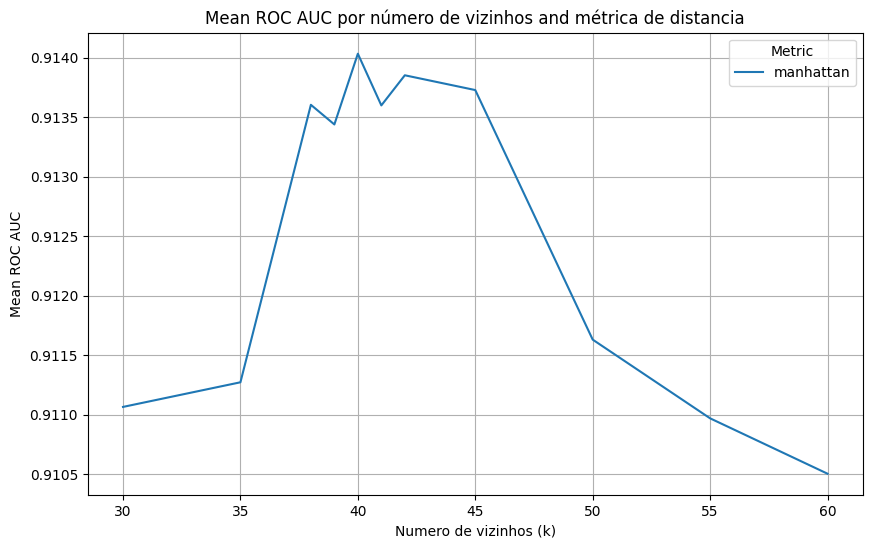

In [77]:
funcao_curva_roc(results_knn)

## 6.2 DecisionTreeClassifier

In [82]:
# Armazenar resultados
results = []

# Definir o modelo
dt = DecisionTreeClassifier()

# Definir o grid de parâmetros a ser testado
param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
}

# Chamar a função ml_fit
results, best_params, best_value = ml_fit(dt, param_grid)

results_dt = pd.DataFrame(results)
# Printar os resultados
results_dt

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy,Accuracy + ROC AUC
0,{'max_depth': 1},0.775086,0.013236,0.335559,0.046236,0.500000,0.041926,1.275086
1,{'max_depth': 2},0.887495,0.015263,0.748666,0.036187,0.746875,0.036577,1.634370
2,{'max_depth': 3},0.918930,0.014902,0.741535,0.050856,0.742500,0.047004,1.661430
3,{'max_depth': 4},0.943968,0.013341,0.794938,0.032591,0.795625,0.030752,1.739593
4,{'max_depth': 5},0.951631,0.008653,0.819814,0.022911,0.818750,0.022879,1.770381
5,{'max_depth': 6},0.939716,0.013969,0.835409,0.024684,0.835000,0.024559,1.774716
6,{'max_depth': 7},0.913770,0.023580,0.831436,0.023277,0.830625,0.023293,1.744395
7,{'max_depth': 8},0.896283,0.016654,0.826447,0.020014,0.825625,0.020243,1.721908
8,{'max_depth': 9},0.888564,0.015728,0.824639,0.020353,0.824375,0.020243,1.712939
9,{'max_depth': 10},0.882870,0.014299,0.822870,0.023962,0.822500,0.023914,1.705370


In [79]:
print(f'Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {best_params}, com o resultado de {best_value}')


Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {'max_depth': 6}, com o resultado de 1.7747437378376358


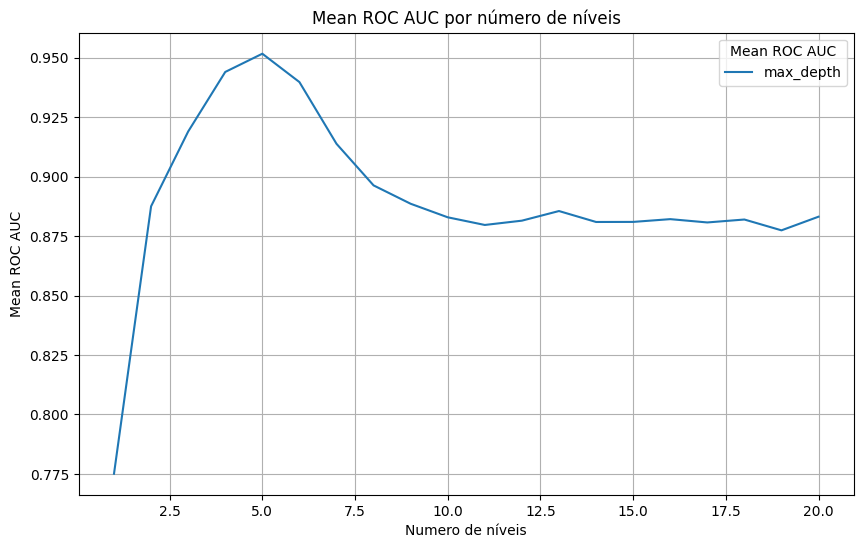

In [84]:
# Add columns for metric and n_neighbors
results_dt['max_depth'] = results_dt['Params'].apply(lambda x: x['max_depth'])

# Plotting
plt.figure(figsize=(10, 6))


plt.plot(results_dt['max_depth'], results_dt['Mean ROC AUC'], label='max_depth')

plt.xlabel('Numero de níveis')
plt.ylabel('Mean ROC AUC')
plt.title('Mean ROC AUC por número de níveis')
plt.legend(title='Mean ROC AUC')
plt.grid(True)
plt.show()

O melhor resultado é o número máximo de nívels igual a 6.

## 6.3  MLPClassifier

In [85]:
# Armazenar resultados
results = []

# Definir o modelo
mlp = MLPClassifier()

# Definir o grid de parâmetros a ser testado
param_grid = {
    'hidden_layer_sizes': [(3,),(5,),(7,),(10,), (50,), (100,), (150,), (200,),(500,)],
    'activation':['identity','logistic'],
    'max_iter': [2000],
}

# Chamar a função ml_fit
results, best_params, best_value = ml_fit(mlp, param_grid)

results_mlp = pd.DataFrame(results)
results_mlp


c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged ye

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy,Accuracy + ROC AUC
0,"{'activation': 'identity', 'hidden_layer_sizes...",0.999043,0.000825,0.971211,0.010947,0.971250,0.010897,1.970293
1,"{'activation': 'identity', 'hidden_layer_sizes...",0.998931,0.000793,0.964366,0.014610,0.964375,0.014537,1.963306
2,"{'activation': 'identity', 'hidden_layer_sizes...",0.999006,0.000792,0.966183,0.017347,0.966250,0.017275,1.965256
3,"{'activation': 'identity', 'hidden_layer_sizes...",0.998980,0.000748,0.967483,0.014254,0.967500,0.014197,1.966480
4,"{'activation': 'identity', 'hidden_layer_sizes...",0.999059,0.000726,0.969346,0.012444,0.969375,0.012327,1.968434
5,"{'activation': 'identity', 'hidden_layer_sizes...",0.999100,0.000669,0.968065,0.014472,0.968125,0.014375,1.967225
6,"{'activation': 'identity', 'hidden_layer_sizes...",0.999098,0.000823,0.970586,0.016322,0.970625,0.016310,1.969723
7,"{'activation': 'identity', 'hidden_layer_sizes...",0.999047,0.000705,0.969355,0.010641,0.969375,0.010625,1.968422
8,"{'activation': 'identity', 'hidden_layer_sizes...",0.999118,0.000682,0.970009,0.012773,0.970000,0.012748,1.969118
9,"{'activation': 'logistic', 'hidden_layer_sizes...",0.998425,0.000792,0.956545,0.010837,0.956875,0.010625,1.955300


In [87]:
print(f'Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {best_params}, com o resultado de {best_value}')

Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {'activation': 'identity', 'hidden_layer_sizes': (3,), 'max_iter': 2000}, com o resultado de 1.970292887321228


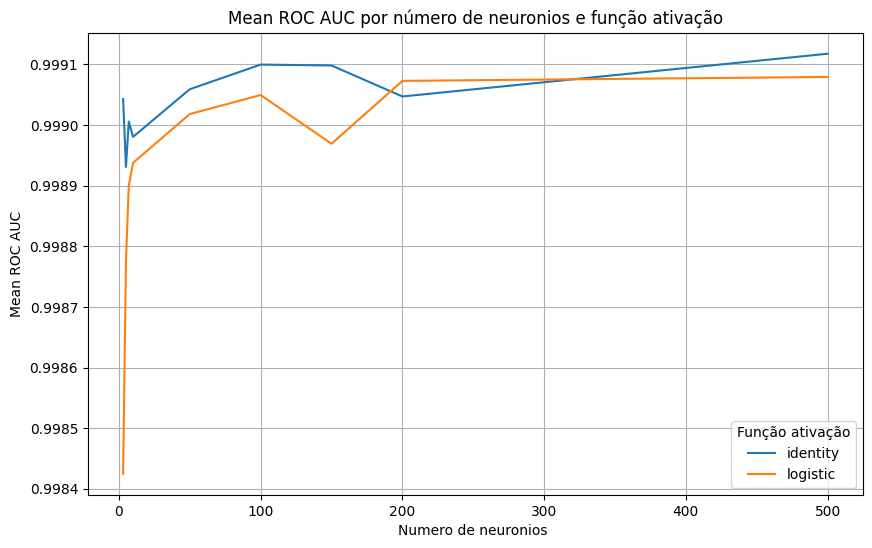

In [86]:
# Add columns for metric and n_neighbors
results_mlp['hidden_layer_sizes'] = results_mlp['Params'].apply(lambda x: x['hidden_layer_sizes'])
results_mlp['activation'] = results_mlp['Params'].apply(lambda x: x['activation'])

# Plotting
plt.figure(figsize=(10, 6))

layers=[3,5,7,10,50,100,150,200,500]

for hls in results_mlp['activation'].unique():
    subset = results_mlp[results_mlp['activation'] == hls]
    plt.plot(layers, subset['Mean ROC AUC'], label=hls)

plt.xlabel('Numero de neuronios ')
plt.ylabel('Mean ROC AUC')
plt.title('Mean ROC AUC por número de neuronios e função ativação')
plt.legend(title='Função ativação')
plt.grid(True)
plt.show()

Vemos que para valores pequenos já se obtem bons resultados.

In [88]:
# Armazenar resultados
results = []

# Definir o modelo
mlp = MLPClassifier()

# Definir o grid de parâmetros a ser testado
param_grid = {
    'hidden_layer_sizes': [(1,),(2,),(3,),(4,), (5,)],
    'activation':['identity','logistic'],
    'max_iter': [2000],
}

# Chamar a função ml_fit
results, best_params, best_value = ml_fit(mlp, param_grid)

results_mlp = pd.DataFrame(results)
results_mlp

c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged ye

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy,Accuracy + ROC AUC
0,"{'activation': 'identity', 'hidden_layer_sizes...",0.999179,0.000696,0.973067,0.013239,0.973125,0.013125,1.972304
1,"{'activation': 'identity', 'hidden_layer_sizes...",0.999099,0.000799,0.973050,0.014339,0.973125,0.014266,1.972224
2,"{'activation': 'identity', 'hidden_layer_sizes...",0.999024,0.000692,0.969959,0.012179,0.970000,0.012119,1.969024
3,"{'activation': 'identity', 'hidden_layer_sizes...",0.998959,0.000765,0.967422,0.012184,0.967500,0.012119,1.966459
4,"{'activation': 'identity', 'hidden_layer_sizes...",0.999057,0.000675,0.969344,0.013845,0.969375,0.013821,1.968432
5,"{'activation': 'logistic', 'hidden_layer_sizes...",0.946281,0.152527,0.818527,0.216626,0.828750,0.191788,1.775031
6,"{'activation': 'logistic', 'hidden_layer_sizes...",0.948177,0.150172,0.874664,0.237303,0.883125,0.213528,1.831302
7,"{'activation': 'logistic', 'hidden_layer_sizes...",0.998395,0.000773,0.958434,0.011739,0.958750,0.011592,1.957145
8,"{'activation': 'logistic', 'hidden_layer_sizes...",0.998767,0.000583,0.963568,0.009776,0.963750,0.009601,1.962517
9,"{'activation': 'logistic', 'hidden_layer_sizes...",0.998828,0.000661,0.964217,0.010977,0.964375,0.010843,1.963203


In [89]:
print(f'Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {best_params}, com o resultado de {best_value}')

Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {'activation': 'identity', 'hidden_layer_sizes': (1,), 'max_iter': 2000}, com o resultado de 1.972304200333657


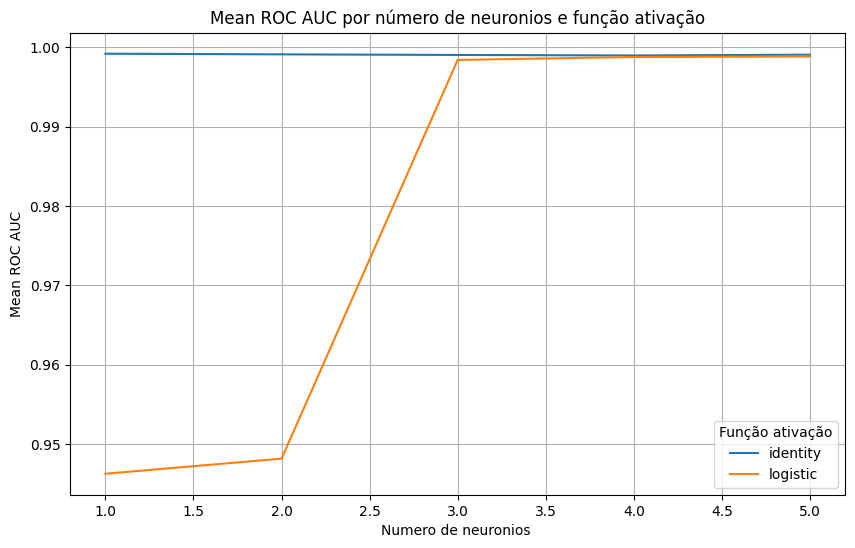

In [90]:
# Add columns for metric and n_neighbors
results_mlp['hidden_layer_sizes'] = results_mlp['Params'].apply(lambda x: x['hidden_layer_sizes'])
results_mlp['activation'] = results_mlp['Params'].apply(lambda x: x['activation'])

# Plotting
plt.figure(figsize=(10, 6))

layers=[1,2,3,4,5]

for hls in results_mlp['activation'].unique():
    subset = results_mlp[results_mlp['activation'] == hls]
    plt.plot(layers, subset['Mean ROC AUC'], label=hls)

plt.xlabel('Numero de neuronios ')
plt.ylabel('Mean ROC AUC')
plt.title('Mean ROC AUC por número de neuronios e função ativação')
plt.legend(title='Função ativação')
plt.grid(True)
plt.show()

Aparentemente, utilizando a função ativação Identidade, um neurônio já seria suficiente para um ótimo desempenho. Vamos considerar dois neurônios, que apresenta um resultado similar.

## 6.4 GaussianNB

In [113]:
# Armazenar resultados
results = []

# Definir o modelo
gnb = GaussianNB()

# Definir o grid de parâmetros a ser testado
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.1],
}

# Chamar a função ml_fit
results, best_params, best_value = ml_fit(gnb, param_grid)

results_gnb = pd.DataFrame(results)
results_gnb

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy,Accuracy + ROC AUC
0,{'var_smoothing': 1e-09},0.951658,0.009505,0.799830,0.030912,0.799375,0.030420,1.751033
1,{'var_smoothing': 1e-08},0.951658,0.009505,0.799830,0.030912,0.799375,0.030420,1.751033
2,{'var_smoothing': 1e-07},0.951658,0.009505,0.799830,0.030912,0.799375,0.030420,1.751033
3,{'var_smoothing': 1e-06},0.951658,0.009505,0.799830,0.030912,0.799375,0.030420,1.751033
4,{'var_smoothing': 1e-05},0.951664,0.009500,0.799830,0.030912,0.799375,0.030420,1.751039
5,{'var_smoothing': 0.0001},0.951697,0.009480,0.799830,0.030912,0.799375,0.030420,1.751072
6,{'var_smoothing': 0.001},0.951927,0.009435,0.800571,0.030998,0.800000,0.030619,1.751927
7,{'var_smoothing': 0.01},0.954949,0.008410,0.807555,0.030963,0.807500,0.030465,1.762449
8,{'var_smoothing': 0.02},0.956718,0.008224,0.813015,0.028743,0.813125,0.028153,1.769843
9,{'var_smoothing': 0.03},0.957557,0.007982,0.819293,0.028289,0.819375,0.027450,1.776932


In [114]:
print(f'Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {best_params}, com o resultado de {best_value}')

Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {'var_smoothing': 0.06}, com o resultado de 1.7805018608093826


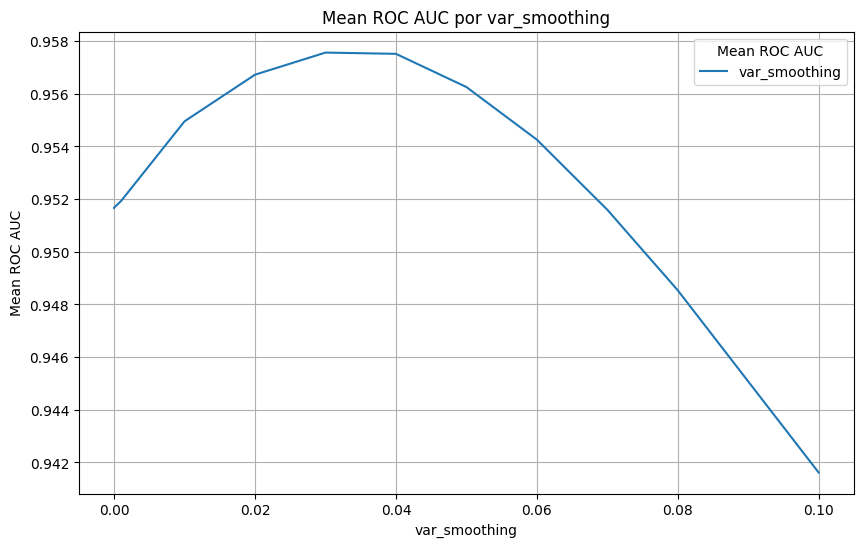

In [115]:
# Add columns for metric and n_neighbors
results_gnb['var_smoothing'] = results_gnb['Params'].apply(lambda x: x['var_smoothing'])

# Plotting
plt.figure(figsize=(10, 6))


plt.plot(results_gnb['var_smoothing'], results_gnb['Mean ROC AUC'], label='var_smoothing')

plt.xlabel('var_smoothing')
plt.ylabel('Mean ROC AUC')
plt.title('Mean ROC AUC por var_smoothing')
plt.legend(title='Mean ROC AUC')
plt.grid(True)
plt.show()

Vemos que os melhores valores de var_smoothing estão entre 0,02 e 0,05.

In [116]:
# Armazenar resultados
results = []

# Definir o modelo
gnb = GaussianNB()

# Definir o grid de parâmetros a ser testado
param_grid = {
    'var_smoothing': [0.02,0.025,0.03,0.031,0.032,0.033,0.034,0.035,0.036,0.037,0.038,0.039,0.04,0.045,0.05],
}

# Chamar a função ml_fit
results, best_params, best_value = ml_fit(gnb, param_grid)

results_gnb = pd.DataFrame(results)
results_gnb

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy,Accuracy + ROC AUC
0,{'var_smoothing': 0.02},0.956718,0.008224,0.813015,0.028743,0.813125,0.028153,1.769843
1,{'var_smoothing': 0.025},0.957202,0.008068,0.818073,0.030846,0.818125,0.030162,1.775327
2,{'var_smoothing': 0.03},0.957557,0.007982,0.819293,0.028289,0.819375,0.027450,1.776932
3,{'var_smoothing': 0.031},0.957564,0.008001,0.817236,0.029021,0.817500,0.027923,1.775064
4,{'var_smoothing': 0.032},0.957594,0.008081,0.816716,0.029589,0.816875,0.028648,1.774469
5,{'var_smoothing': 0.033},0.957684,0.008031,0.817344,0.030025,0.817500,0.029288,1.775184
6,{'var_smoothing': 0.034},0.957741,0.008027,0.817344,0.030025,0.817500,0.029288,1.775241
7,{'var_smoothing': 0.035},0.957714,0.008051,0.816641,0.030646,0.816875,0.029980,1.774589
8,{'var_smoothing': 0.036},0.957793,0.008051,0.817413,0.030651,0.817500,0.029817,1.775293
9,{'var_smoothing': 0.037},0.957732,0.008105,0.818071,0.031633,0.818125,0.030676,1.775857


In [117]:
print(f'Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {best_params}, com o resultado de {best_value}')

Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {'var_smoothing': 0.05}, com o resultado de 1.7799992293294715


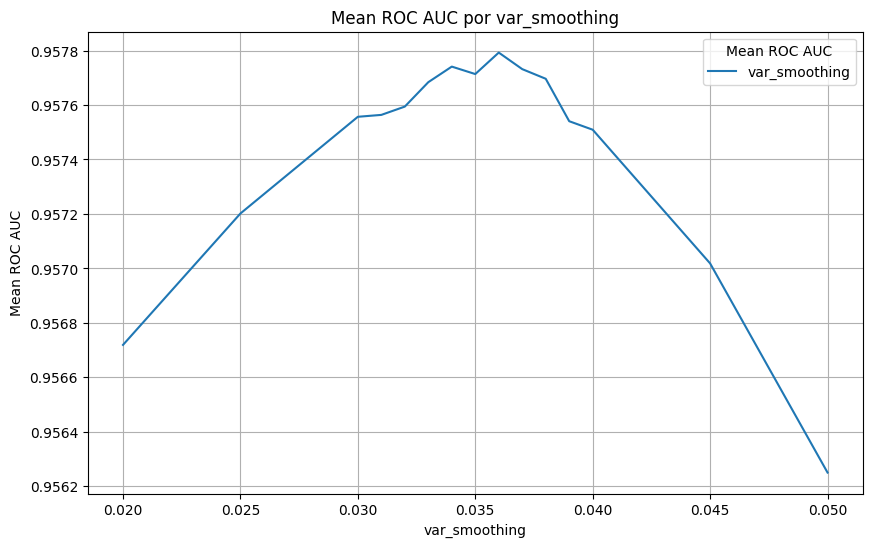

In [118]:
# Add columns for metric and n_neighbors
results_gnb['var_smoothing'] = results_gnb['Params'].apply(lambda x: x['var_smoothing'])

# Plotting
plt.figure(figsize=(10, 6))


plt.plot(results_gnb['var_smoothing'], results_gnb['Mean ROC AUC'], label='var_smoothing')

plt.xlabel('var_smoothing')
plt.ylabel('Mean ROC AUC')
plt.title('Mean ROC AUC por var_smoothing')
plt.legend(title='Mean ROC AUC')
plt.grid(True)
plt.show()

O melhor desempenho foi encontrado utilizando o var_smoothing =  0,036

## 6.5 SVM

In [95]:

# Armazenar resultados
results = []

# Definir o modelo
svc = SVC()

# Definir o grid de parâmetros a ser testado
#param_grid = {
#    'C': [0.1, 1, 10, 100],
#    'probability': [True],
#}

# escolhendo a lista de combinações para usar o no gridsearch 
param_grid = {
    "kernel": ['linear', 'rbf'],  # Remover 'poly' se não for crucial
    "C": [0.1, 1, 10],            # Menor número de valores
    "gamma": [0.01, 0.1, 1],      # Menor número de valores
    'probability': [True],
}


# Chamar a função ml_fit
results, best_params, best_value = ml_fit(svc, param_grid)

results_svc = pd.DataFrame(results)
results_svc


,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy,Accuracy + ROC AUC
0,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear', ...",0.993984,0.002750,0.926720,0.018077,0.926250,0.018286,1.920234
1,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'pr...",0.732366,0.039460,0.098552,0.047098,0.232500,0.045139,0.964866
2,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear', '...",0.994037,0.002703,0.926720,0.018077,0.926250,0.018286,1.920287
3,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf', 'pro...",0.890287,0.011676,0.555893,0.065601,0.569375,0.058058,1.459662
4,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear', 'pr...",0.994081,0.002670,0.926720,0.018077,0.926250,0.018286,1.920331
5,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf', 'proba...",0.934199,0.011150,0.723349,0.030261,0.718125,0.029242,1.652324
6,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear', 'p...",0.997697,0.001007,0.953042,0.012549,0.953125,0.012578,1.950822
7,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf', 'prob...",0.901991,0.012250,0.613868,0.057282,0.619375,0.047224,1.521366
8,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear', 'pr...",0.997664,0.000991,0.953042,0.012549,0.953125,0.012578,1.950789
9,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'proba...",0.994294,0.001751,0.926617,0.015155,0.926250,0.015258,1.920544


In [97]:
print(f'Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {best_params}, com o resultado de {best_value}')

Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {'C': 10, 'gamma': 0.01, 'kernel': 'linear', 'probability': True}, com o resultado de 1.9611750530453387


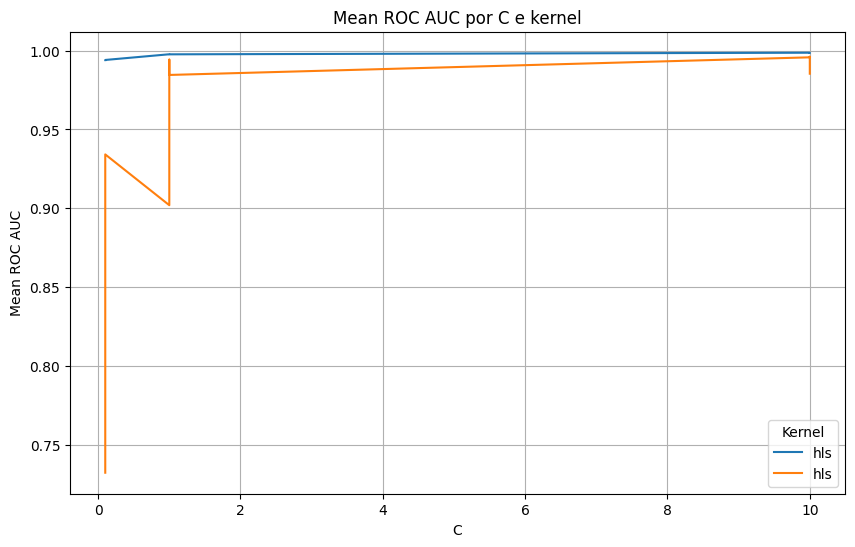

In [96]:
# Add columns for metric and n_neighbors
results_svc['C'] = results_svc['Params'].apply(lambda x: x['C'])
results_svc['kernel'] = results_svc['Params'].apply(lambda x: x['kernel'])
results_svc['gamma'] = results_svc['Params'].apply(lambda x: x['gamma'])

# Plotting
plt.figure(figsize=(10, 6))


for hls in results_svc['kernel'].unique():
    subset = results_svc[results_svc['kernel'] == hls]
    plt.plot(subset['C'], subset['Mean ROC AUC'], label='hls')

plt.xlabel('C')
plt.ylabel('Mean ROC AUC')
plt.title('Mean ROC AUC por C e kernel')
plt.legend(title='Kernel')
plt.grid(True)
plt.show()

Vemos que o melhor kernel a se testar é o linear.

In [99]:

# Armazenar resultados
results = []

# Definir o modelo
svc = SVC()

# Definir o grid de parâmetros a ser testado
#param_grid = {
#    'C': [0.1, 1, 10, 100],
#    'probability': [True],
#}

# escolhendo a lista de combinações para usar o no gridsearch 
param_grid = {
    "kernel": ['linear'],  # Remover 'poly' se não for crucial
    "C": [0.1, 1, 10],            # Menor número de valores
    "gamma": [0.01, 0.1, 1],      # Menor número de valores
    'probability': [True],
}


# Chamar a função ml_fit
results, best_params, best_value = ml_fit(svc, param_grid)

results_svc = pd.DataFrame(results)
results_svc

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy,Accuracy + ROC AUC
0,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear', ...",0.994099,0.002677,0.926720,0.018077,0.926250,0.018286,1.920349
1,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear', '...",0.994077,0.002689,0.926720,0.018077,0.926250,0.018286,1.920327
2,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear', 'pr...",0.994057,0.002679,0.926720,0.018077,0.926250,0.018286,1.920307
3,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear', 'p...",0.997717,0.000978,0.953042,0.012549,0.953125,0.012578,1.950842
4,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear', 'pr...",0.997663,0.000990,0.953042,0.012549,0.953125,0.012578,1.950788
5,"{'C': 1, 'gamma': 1, 'kernel': 'linear', 'prob...",0.997693,0.000989,0.953042,0.012549,0.953125,0.012578,1.950818
6,"{'C': 10, 'gamma': 0.01, 'kernel': 'linear', '...",0.998677,0.000680,0.962341,0.010936,0.962500,0.010825,1.961177
7,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear', 'p...",0.998644,0.000679,0.962341,0.010936,0.962500,0.010825,1.961144
8,"{'C': 10, 'gamma': 1, 'kernel': 'linear', 'pro...",0.998629,0.000692,0.962341,0.010936,0.962500,0.010825,1.961129


In [100]:
print(f'Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {best_params}, com o resultado de {best_value}')

Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {'C': 10, 'gamma': 0.01, 'kernel': 'linear', 'probability': True}, com o resultado de 1.9611772323387513


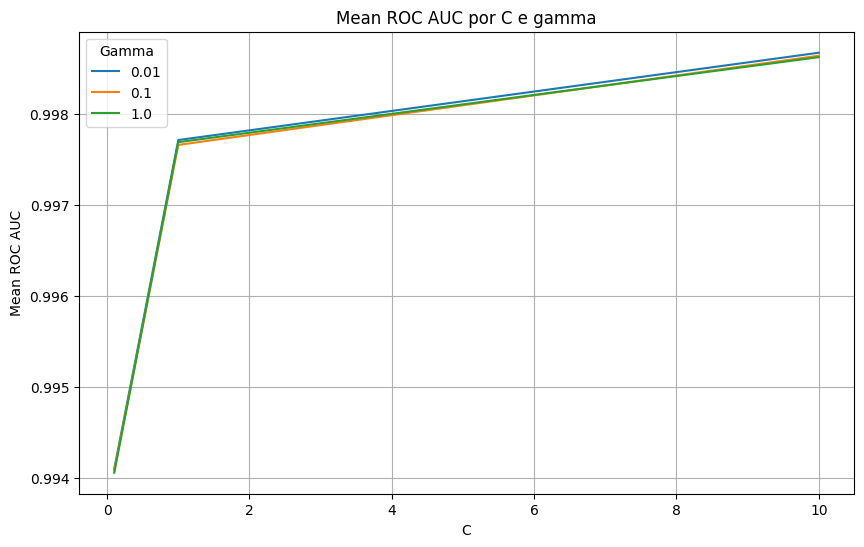

In [101]:
# Add columns for metric and n_neighbors
results_svc['C'] = results_svc['Params'].apply(lambda x: x['C'])
results_svc['kernel'] = results_svc['Params'].apply(lambda x: x['kernel'])
results_svc['gamma'] = results_svc['Params'].apply(lambda x: x['gamma'])

# Plotting
plt.figure(figsize=(10, 6))


for hls in results_svc['gamma'].unique():
    subset = results_svc[results_svc['gamma'] == hls]
    plt.plot(subset['C'], subset['Mean ROC AUC'], label=hls)

plt.xlabel('C')
plt.ylabel('Mean ROC AUC')
plt.title('Mean ROC AUC por C e gamma')
plt.legend(title='Gamma')
plt.grid(True)
plt.show()

Com relação a Gamma, não vemos uma grande diferença entre os valores. Iremos seguir com 0,01.

In [102]:

# Armazenar resultados
results = []

# Definir o modelo
svc = SVC()

# Definir o grid de parâmetros a ser testado
#param_grid = {
#    'C': [0.1, 1, 10, 100],
#    'probability': [True],
#}

# escolhendo a lista de combinações para usar o no gridsearch 
param_grid = {
    "kernel": ['linear'],  # Remover 'poly' se não for crucial
    "C": [10,20,50,100],            # Menor número de valores
    "gamma": [0.01],      # Menor número de valores
    'probability': [True],
}


# Chamar a função ml_fit
results, best_params, best_value = ml_fit(svc, param_grid)

results_svc = pd.DataFrame(results)
results_svc

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy,Accuracy + ROC AUC
0,"{'C': 10, 'gamma': 0.01, 'kernel': 'linear', '...",0.998650,0.000699,0.962341,0.010936,0.962500,0.010825,1.961150
1,"{'C': 20, 'gamma': 0.01, 'kernel': 'linear', '...",0.998690,0.000800,0.967428,0.014213,0.967500,0.014197,1.966190
2,"{'C': 50, 'gamma': 0.01, 'kernel': 'linear', '...",0.998771,0.000854,0.969952,0.012483,0.970000,0.012437,1.968771
3,"{'C': 100, 'gamma': 0.01, 'kernel': 'linear', ...",0.998696,0.000911,0.965524,0.015199,0.965625,0.015117,1.964321


In [103]:
print(f'Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {best_params}, com o resultado de {best_value}')

Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {'C': 50, 'gamma': 0.01, 'kernel': 'linear', 'probability': True}, com o resultado de 1.9687712040872634


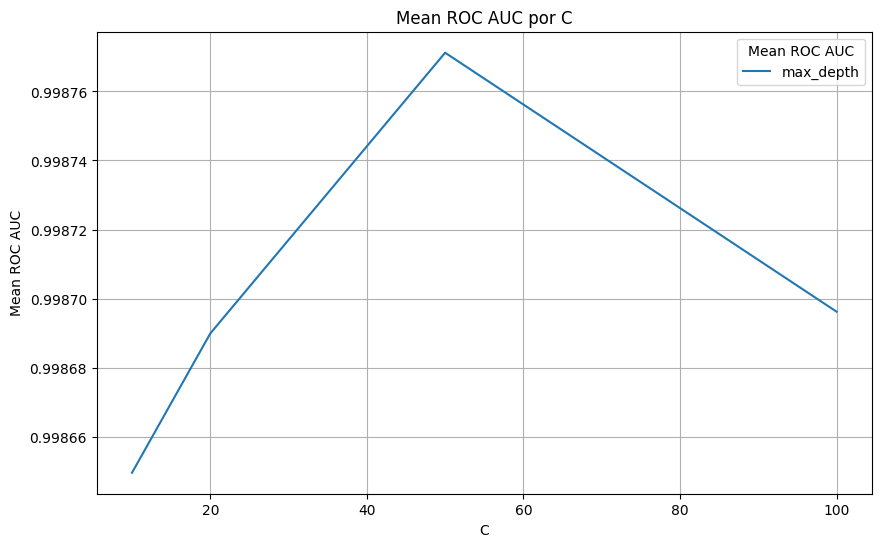

In [104]:
# Add columns for metric and n_neighbors
results_svc['C'] = results_svc['Params'].apply(lambda x: x['C'])

# Plotting
plt.figure(figsize=(10, 6))


plt.plot(results_svc['C'], results_svc['Mean ROC AUC'], label='max_depth')

plt.xlabel('C')
plt.ylabel('Mean ROC AUC')
plt.title('Mean ROC AUC por C')
plt.legend(title='Mean ROC AUC')
plt.grid(True)
plt.show()

Vemos que o melhor C está entre 40 e 60.

In [105]:

# Armazenar resultados
results = []

# Definir o modelo
svc = SVC()

# Definir o grid de parâmetros a ser testado
#param_grid = {
#    'C': [0.1, 1, 10, 100],
#    'probability': [True],
#}

# escolhendo a lista de combinações para usar o no gridsearch 
param_grid = {
    "kernel": ['linear'],  # Remover 'poly' se não for crucial
    "C": [50,51,52,53,54,55,56,57,58,59,60],            # Menor número de valores
    "gamma": [0.01],      # Menor número de valores
    'probability': [True],
}


# Chamar a função ml_fit
results, best_params, best_value = ml_fit(svc, param_grid)

results_svc = pd.DataFrame(results)
results_svc

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy,Accuracy + ROC AUC
0,"{'C': 50, 'gamma': 0.01, 'kernel': 'linear', '...",0.998770,0.000870,0.969952,0.012483,0.970000,0.012437,1.968770
1,"{'C': 51, 'gamma': 0.01, 'kernel': 'linear', '...",0.998741,0.000884,0.969317,0.011716,0.969375,0.011676,1.968116
2,"{'C': 52, 'gamma': 0.01, 'kernel': 'linear', '...",0.998710,0.000874,0.968692,0.011218,0.968750,0.011180,1.967460
3,"{'C': 53, 'gamma': 0.01, 'kernel': 'linear', '...",0.998683,0.000904,0.968692,0.011218,0.968750,0.011180,1.967433
4,"{'C': 54, 'gamma': 0.01, 'kernel': 'linear', '...",0.998684,0.000881,0.969312,0.011713,0.969375,0.011676,1.968059
5,"{'C': 55, 'gamma': 0.01, 'kernel': 'linear', '...",0.998754,0.000901,0.969312,0.011713,0.969375,0.011676,1.968129
6,"{'C': 56, 'gamma': 0.01, 'kernel': 'linear', '...",0.998759,0.000867,0.969938,0.012477,0.970000,0.012437,1.968759
7,"{'C': 57, 'gamma': 0.01, 'kernel': 'linear', '...",0.998734,0.000847,0.969938,0.012477,0.970000,0.012437,1.968734
8,"{'C': 58, 'gamma': 0.01, 'kernel': 'linear', '...",0.998765,0.000857,0.969317,0.012979,0.969375,0.012945,1.968140
9,"{'C': 59, 'gamma': 0.01, 'kernel': 'linear', '...",0.998762,0.000890,0.968056,0.013001,0.968125,0.012945,1.966887


In [106]:
print(f'Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {best_params}, com o resultado de {best_value}')

Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {'C': 50, 'gamma': 0.01, 'kernel': 'linear', 'probability': True}, com o resultado de 1.9687702181992341


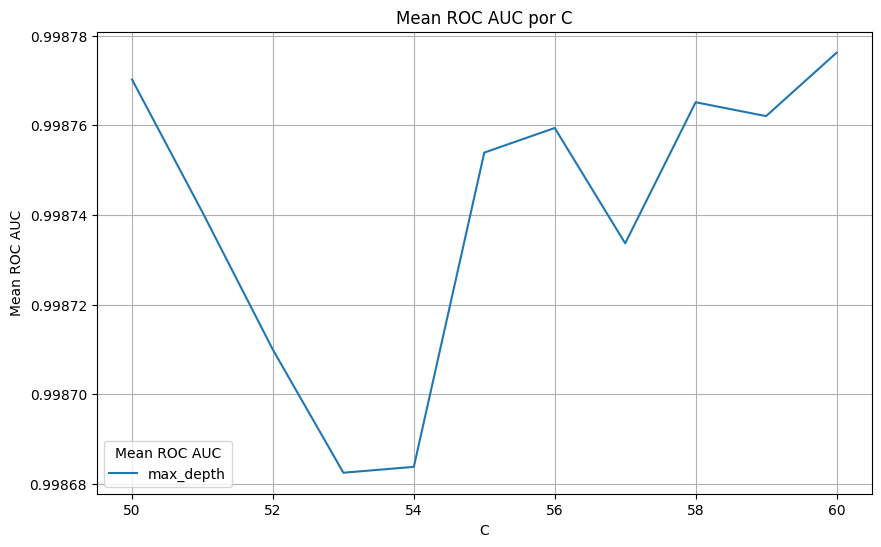

In [107]:
# Add columns for metric and n_neighbors
results_svc['C'] = results_svc['Params'].apply(lambda x: x['C'])

# Plotting
plt.figure(figsize=(10, 6))


plt.plot(results_svc['C'], results_svc['Mean ROC AUC'], label='max_depth')

plt.xlabel('C')
plt.ylabel('Mean ROC AUC')
plt.title('Mean ROC AUC por C')
plt.legend(title='Mean ROC AUC')
plt.grid(True)
plt.show()

Por fim, o melhor valor de C é 58.

## 6.6 Random Forest

In [108]:

# Armazenar resultados
results = []

# Definir o modelo
rf = RandomForestClassifier()

# Definir o grid de parâmetros a ser testado
param_grid = {
    'n_estimators': [10, 100, 250],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
}

# Chamar a função ml_fit
results, best_params, best_value = ml_fit(rf, param_grid)

results_rf = pd.DataFrame(results)
results_rf

,Params,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score,Mean Accuracy,Std Accuracy,Accuracy + ROC AUC
0,"{'max_depth': 1, 'n_estimators': 10}",0.814656,0.026885,0.465014,0.099672,0.540000,0.061631,1.354656
1,"{'max_depth': 1, 'n_estimators': 100}",0.839389,0.022721,0.471477,0.090573,0.554375,0.058299,1.393764
2,"{'max_depth': 1, 'n_estimators': 250}",0.846513,0.025170,0.477308,0.092246,0.555625,0.058058,1.402138
3,"{'max_depth': 2, 'n_estimators': 10}",0.919047,0.018696,0.733961,0.056732,0.746875,0.045004,1.665922
4,"{'max_depth': 2, 'n_estimators': 100}",0.930672,0.013119,0.759682,0.061851,0.772500,0.054141,1.703172
5,"{'max_depth': 2, 'n_estimators': 250}",0.932002,0.012395,0.769416,0.057310,0.783125,0.050393,1.715127
6,"{'max_depth': 3, 'n_estimators': 10}",0.929980,0.025251,0.763564,0.076855,0.768750,0.074948,1.698730
7,"{'max_depth': 3, 'n_estimators': 100}",0.949599,0.012212,0.797306,0.045031,0.803750,0.042038,1.753349
8,"{'max_depth': 3, 'n_estimators': 250}",0.951570,0.011587,0.805581,0.048972,0.812500,0.045242,1.764070
9,"{'max_depth': 4, 'n_estimators': 10}",0.939066,0.021616,0.764156,0.054328,0.768125,0.052623,1.707191


In [109]:
print(f'Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {best_params}, com o resultado de {best_value}')

Os melhores parâmetros considerando a soma da ROC AUC e acurácia foram: {'max_depth': 13, 'n_estimators': 250}, com o resultado de 1.8814997811905267


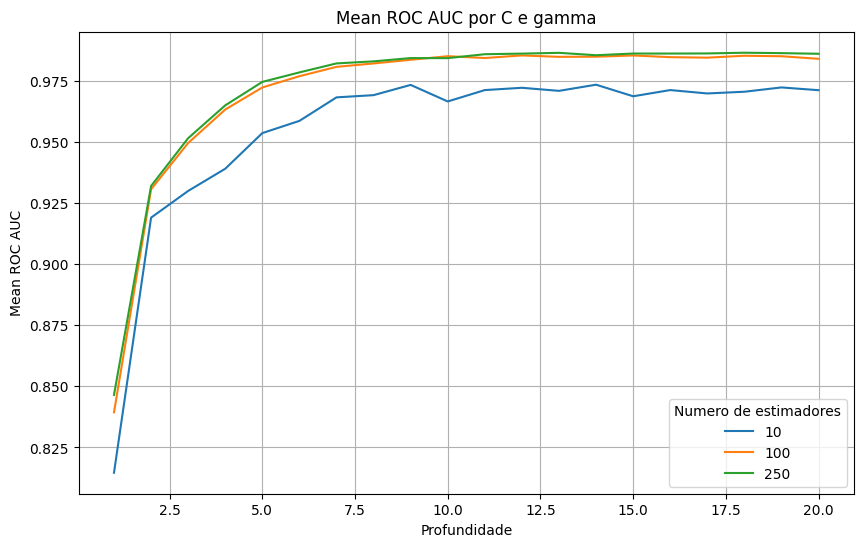

In [110]:
# Add columns for metric and n_neighbors
results_rf['n_estimators'] = results_rf['Params'].apply(lambda x: x['n_estimators'])
results_rf['max_depth'] = results_rf['Params'].apply(lambda x: x['max_depth'])


# Plotting
plt.figure(figsize=(10, 6))


for hls in results_rf['n_estimators'].unique():
    subset = results_rf[results_rf['n_estimators'] == hls]
    plt.plot(subset['max_depth'], subset['Mean ROC AUC'], label=hls)

plt.xlabel('Profundidade')
plt.ylabel('Mean ROC AUC')
plt.title('Mean ROC AUC por C e gamma')
plt.legend(title='Numero de estimadores')
plt.grid(True)
plt.show()

Vemos que com 100 ou 250 estimadores o desempenho é similar e que a partir da profundida 10 o desempenho parece estabilizar. Então iremos ecolher 100 estimadores e 10 de profundidade.

# 7.0 Matriz de confusão e metricas

## 7.1 Função para gerar as metricas

In [127]:
def generate_confusion_matrix(model, params, X_train, X_test, y_train, y_test):

    # Separar em treino e validação
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
    # Ajustar o modelo com os parâmetros fornecidos
    model.set_params(**params)
    
    #Treinar o modelo
    model.fit(X_train, y_train)

     # Predizer resultados
    y_pred = model.predict(X_val)
    y_pred_test = model.predict(X_test)
        
    # Calcular a matriz de confusão para esta divisão
    conf_matrix_train = confusion_matrix(y_val, y_pred, labels=np.unique(y))
    conf_matrix_test = confusion_matrix(y_test, y_pred_test, labels=np.unique(y))
    
    #plotar a matriz
    class_names = np.unique(y_val).astype(str)
    
     # Plotar matrizes de confusão
    plot_confusion_matrix(conf_matrix_train, class_names, 'Confusion Matrix - Validação')
    plot_confusion_matrix(conf_matrix_test, class_names, 'Confusion Matrix - Teste')
    
    # Calcular e imprimir métricas
    print('Acurácia de Validação:', accuracy_score(y_val, y_pred))
    
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print('Acurácia de teste:', test_accuracy)

    # Calcular ROC AUC para a validação e teste
    y_val_bin = label_binarize(y_val, classes=np.unique(y_train))
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    
    # Obter as probabilidades preditas
    y_val_proba = model.predict_proba(X_val)
    y_test_proba = model.predict_proba(X_test)
    
    # Calcular o ROC AUC
    val_roc_auc = roc_auc_score(y_val_bin, y_val_proba, average='macro', multi_class='ovr')
    test_roc_auc = roc_auc_score(y_test_bin, y_test_proba, average='macro', multi_class='ovr')
    
    print('ROC AUC (Validação):', val_roc_auc)
    print('ROC AUC (Teste):', test_roc_auc)
    
    return test_accuracy

def plot_confusion_matrix(conf_matrix, class_names, title):
    fig, ax = plt.subplots(figsize=(5, 4))
    cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.title(title)
    
    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            plt.text(j, i, format(conf_matrix[i, j], '.2f'),
                     ha="center", va="center",
                     color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")
    
    plt.show()

def plot_decision_regions(X, y, classifier, title, accuracy, feature1, feature2, X_train_mean, resolution=0.02):
    feature1 = 0  # índice da primeira feature
    feature2 = 6  # índice da segunda feature
    # Calculando a média de cada feature no conjunto de treinamento
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = -0.5, 1.5
    x2_min, x2_max = -0.5, 1.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Criando um grid de pontos
    grid_points = np.c_[xx1.ravel(), xx2.ravel()]
    
    # Ajuste para a predição usando todas as features
    X_full = np.tile(X_train_mean, (grid_points.shape[0], 1))
    X_full[:, feature1] = grid_points[:, 0]
    X_full[:, feature2] = grid_points[:, 1]
    
    Z = classifier.predict(X_full)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class {cl}', edgecolor='black')
    
    plt.title(f'{title}\nTaxa de acerto: {accuracy*100}%)')
    plt.xlabel(df2.columns[feature1])
    plt.ylabel(df2.columns[feature2])
    plt.legend(loc='upper left')
    plt.tight_layout()

## 7.2 KNN

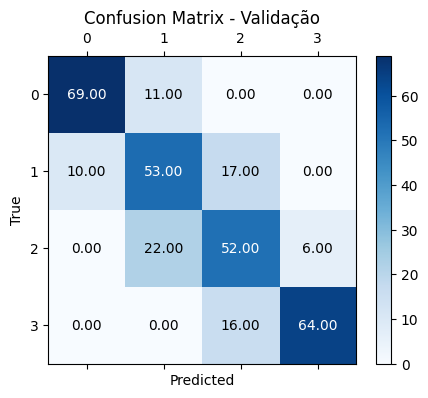

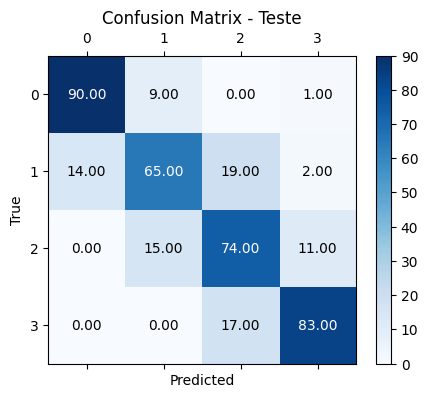

Acurácia de Validação: 0.74375
Acurácia de teste: 0.78
ROC AUC (Validação): 0.9038932291666667
ROC AUC (Teste): 0.9193166666666668


c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\michele\AppData\Local\Temp\ipykernel_7708\1597971187.py:103: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


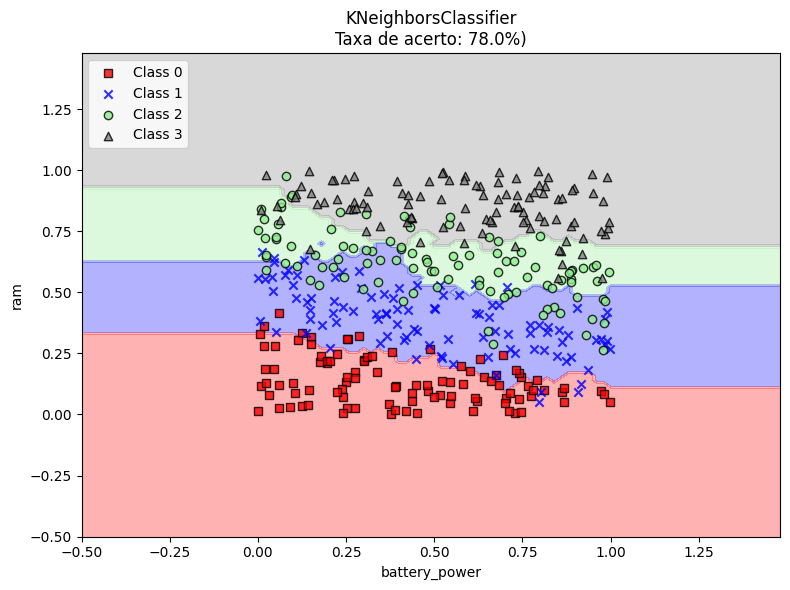

In [128]:
# Definir o modelo
knn = KNeighborsClassifier()

# Definir os parâmetros do modelo
params = {'metric': 'manhattan', 'n_neighbors': 38}

# Chamar a função generate_confusion_matrix
accuracy = generate_confusion_matrix(knn, params, X_train, X_test, y_train, y_test)

# Selecionar as features para plotagem
feature1 = 0  # índice da primeira feature
feature2 = 6  # índice da segunda feature

X_plot = X_test.iloc[:, [feature1, feature2]].values  # Selecionando apenas as duas features para plotagem
X_train_mean = X_train.mean(axis=0).values  # Calculando a média de cada feature no conjunto de treinamento

# Plotar a região de decisão
plt.figure(figsize=(8, 6))
plot_decision_regions(X_plot, y_test.values, knn, "KNeighborsClassifier", accuracy, feature1, feature2, X_train_mean)
plt.show()

## 7.3 Arvore de decisão

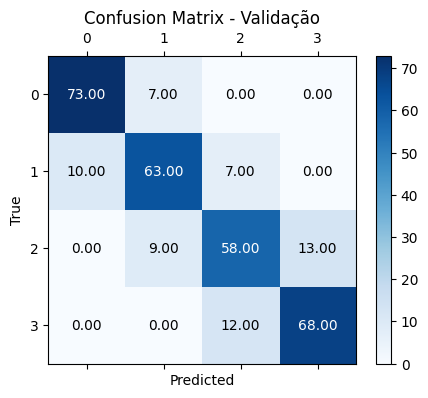

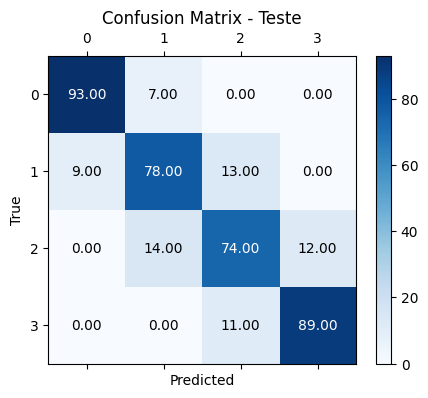

Acurácia de Validação: 0.81875
Acurácia de teste: 0.835
ROC AUC (Validação): 0.9314192708333333
ROC AUC (Teste): 0.9377749999999999


c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\michele\AppData\Local\Temp\ipykernel_7708\1597971187.py:103: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


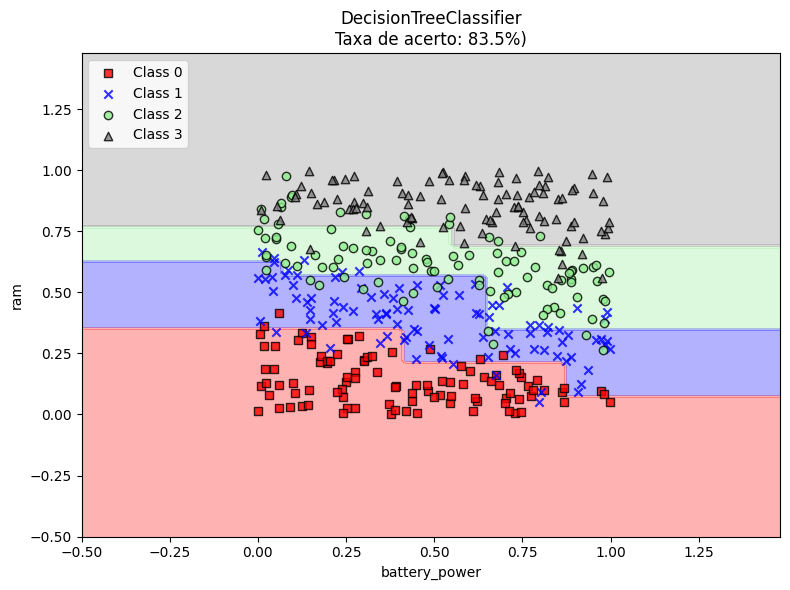

In [129]:
# Definir o modelo
dt = DecisionTreeClassifier()

# Definir os parâmetros do modelo
params = {'max_depth': 6}	
# Explicação escolha parâmetro
# apesar da matriz ROC o melhor resultado tenha sido para max_depth =5
# max_depth =6 também apresentou um valor alto na matriz ROC e sua acurácia foi mais elevada, o que justificou sua escolha
# Chamar a função generate_confusion_matrix
accuracy = generate_confusion_matrix(dt, params, X_train, X_test, y_train, y_test)

# Selecionar as features para plotagem
feature1 = 0  # índice da primeira feature
feature2 = 6  # índice da segunda feature

X_plot = X_test.iloc[:, [feature1, feature2]].values  # Selecionando apenas as duas features para plotagem
X_train_mean = X_train.mean(axis=0).values  # Calculando a média de cada feature no conjunto de treinamento

# Plotar a região de decisão
plt.figure(figsize=(8, 6))
plot_decision_regions(X_plot, y_test.values, dt, "DecisionTreeClassifier", accuracy, feature1, feature2, X_train_mean)
plt.show()

## 7.4 MLP

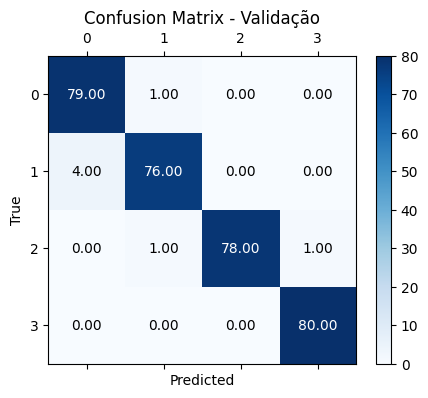

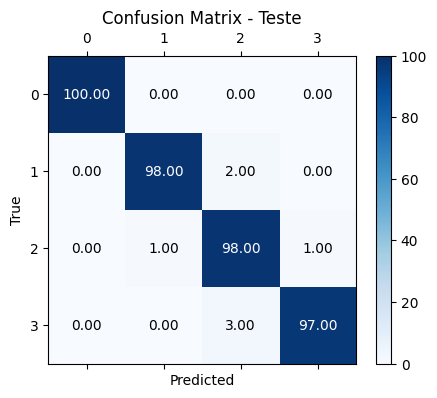

Acurácia de Validação: 0.978125
Acurácia de teste: 0.9825
ROC AUC (Validação): 0.9992578125
ROC AUC (Teste): 0.9996166666666666


c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\michele\AppData\Local\Temp\ipykernel_7708\1597971187.py:103: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


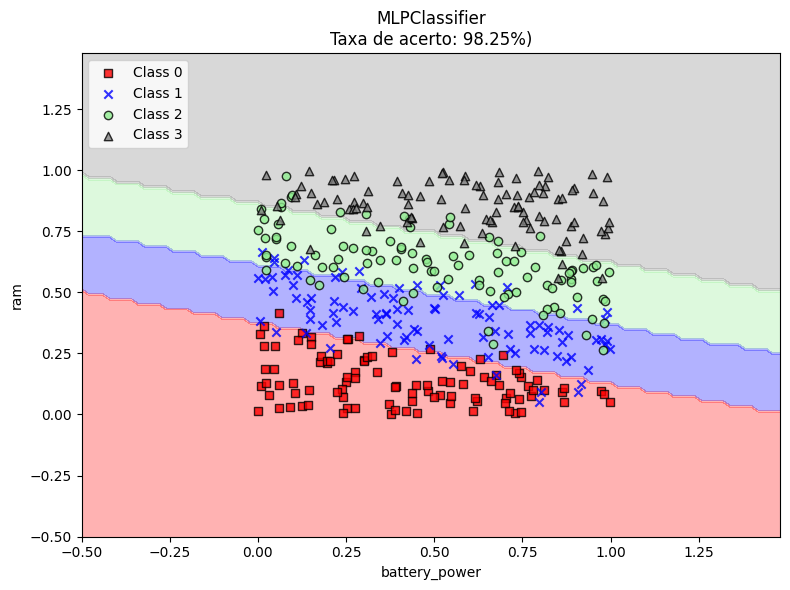

In [130]:
# Definir o modelo
mlp = MLPClassifier()

# Definir os parâmetros do modelo
params = {
    'activation':'identity', 'hidden_layer_sizes':(2,), 'max_iter':2000
}
#Explicação escolha parâmetros
#Todos os resultados na matriz ROC foram em torno de 99% 
#Olhamos também para acurácia para bater o martelo
# Dessa forma o parâmetro escolhido foi o que teve a maior acurácia (97%), no  mais baixo custo computacional

# Chamar a função generate_confusion_matrix
accuracy = generate_confusion_matrix(mlp, params, X_train, X_test, y_train, y_test)

# Selecionar as features para plotagem
feature1 = 0  # índice da primeira feature
feature2 = 6  # índice da segunda feature

X_plot = X_test.iloc[:, [feature1, feature2]].values  # Selecionando apenas as duas features para plotagem
X_train_mean = X_train.mean(axis=0).values  # Calculando a média de cada feature no conjunto de treinamento

# Plotar a região de decisão
plt.figure(figsize=(8, 6))
plot_decision_regions(X_plot, y_test.values, mlp, "MLPClassifier", accuracy, feature1, feature2, X_train_mean)
plt.show()

## 7.5 Nayve Bayes

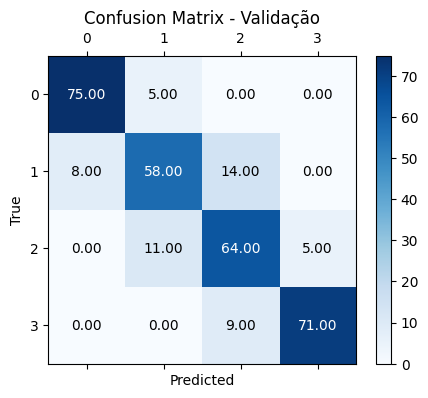

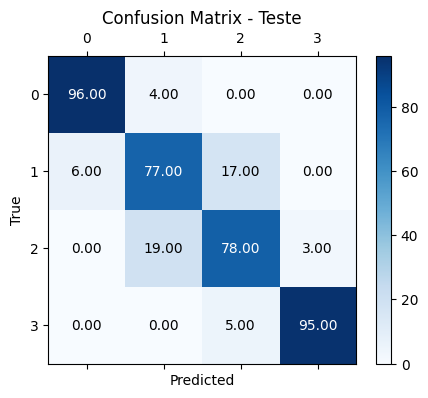

Acurácia de Validação: 0.8375
Acurácia de teste: 0.865
ROC AUC (Validação): 0.9612369791666666
ROC AUC (Teste): 0.9620249999999999


c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\michele\AppData\Local\Temp\ipykernel_7708\1597971187.py:103: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


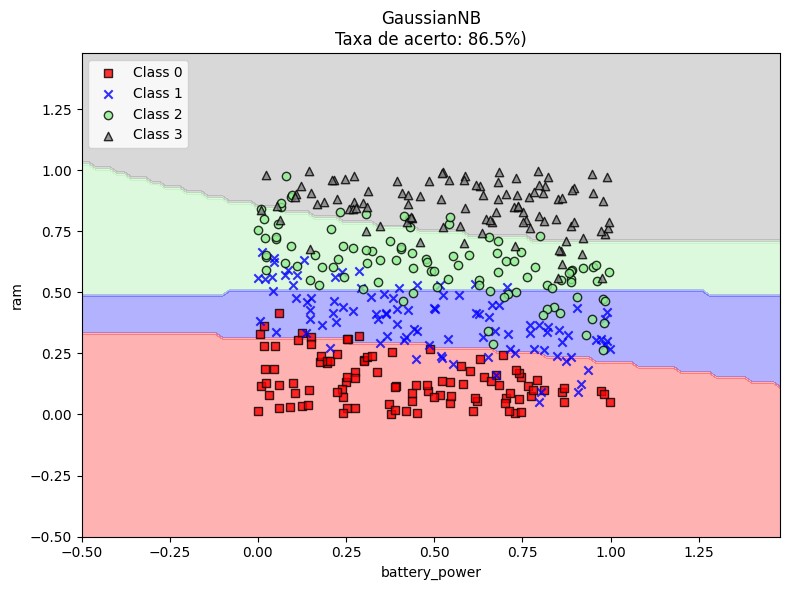

In [131]:
# Definir o modelo
gnb = GaussianNB()

# Definir os parâmetros do modelo
params = {'var_smoothing': 0.036}	

# Explicação escolha parâmetro
# Não houve diferença na performance com a variação do parâmetro, escolhido de forma aleatória

# Chamar a função generate_confusion_matrix
accuracy = generate_confusion_matrix(gnb, params, X_train, X_test, y_train, y_test)

# Selecionar as features para plotagem
feature1 = 0  # índice da primeira feature
feature2 = 6  # índice da segunda feature

X_plot = X_test.iloc[:, [feature1, feature2]].values  # Selecionando apenas as duas features para plotagem
X_train_mean = X_train.mean(axis=0).values  # Calculando a média de cada feature no conjunto de treinamento

# Plotar a região de decisão
plt.figure(figsize=(8, 6))
plot_decision_regions(X_plot, y_test.values, gnb, "GaussianNB", accuracy, feature1, feature2, X_train_mean)
plt.show()

## 7.6 SVM

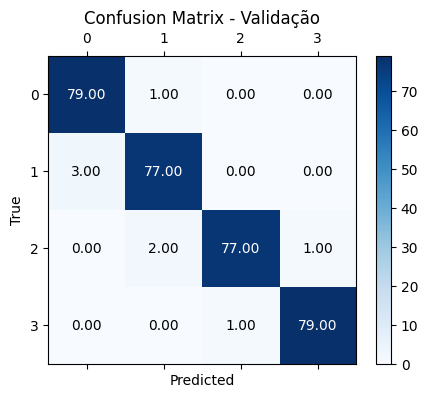

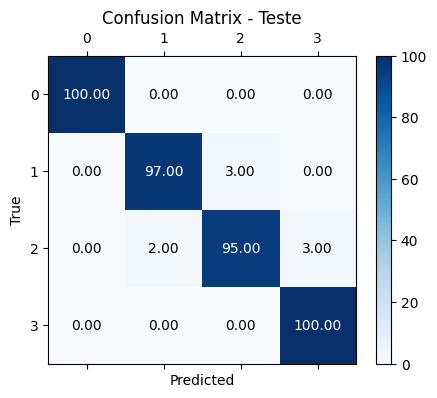

Acurácia de Validação: 0.975
Acurácia de teste: 0.98
ROC AUC (Validação): 0.9993619791666668
ROC AUC (Teste): 0.9994916666666667


c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\michele\AppData\Local\Temp\ipykernel_7708\1597971187.py:103: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


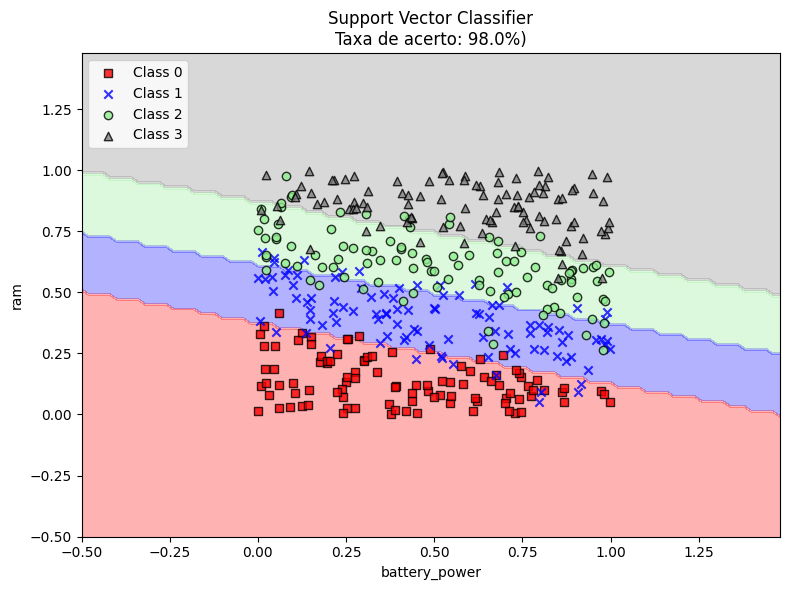

In [132]:
# Definir o modelo
svm = SVC(probability=True)

# Definir os parâmetros do modelo
params = {
    'C': 50,
    'kernel': 'linear',
    'gamma': 0.01,
    'probability':True
}
# Explicação escolha parâmetros
# O parâmetro escolhido apresentou 99% na curva ROC e 96% na acurácia
# Os resultados mais elevados, comparado a os outros parâmetros testados

# Chamar a função generate_confusion_matrix
accuracy = generate_confusion_matrix(svm, params, X_train, X_test, y_train, y_test)

# Selecionar as features para plotagem
feature1 = 0  # índice da primeira feature
feature2 = 6  # índice da segunda feature

X_plot = X_test.iloc[:, [feature1, feature2]].values  # Selecionando apenas as duas features para plotagem
X_train_mean = X_train.mean(axis=0).values  # Calculando a média de cada feature no conjunto de treinamento

# Plotar a região de decisão
plt.figure(figsize=(8, 6))
plot_decision_regions(X_plot, y_test.values, svm, "Support Vector Classifier", accuracy, feature1, feature2, X_train_mean)
plt.show()

## 7.7 Random Forest

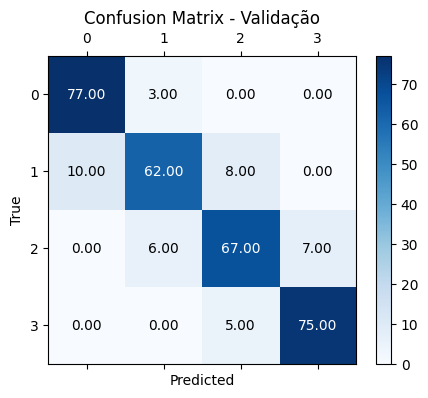

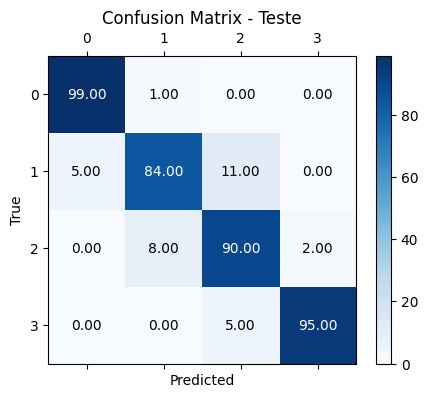

Acurácia de Validação: 0.878125
Acurácia de teste: 0.92
ROC AUC (Validação): 0.9810286458333333
ROC AUC (Teste): 0.9853083333333333


c:\Users\michele\anaconda3\envs\ds_em_producao\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\michele\AppData\Local\Temp\ipykernel_7708\1597971187.py:103: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


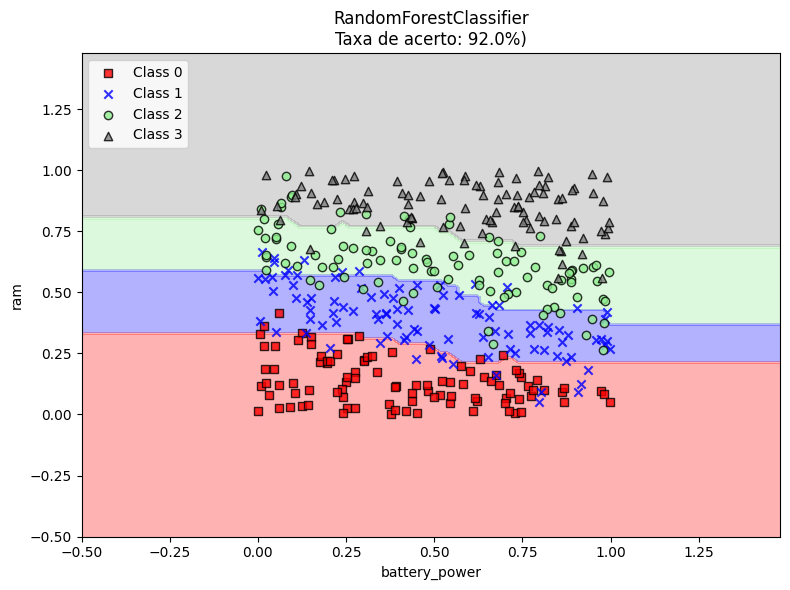

In [133]:
# Definir o modelo
rf = RandomForestClassifier()

# Definir os parâmetros do modelo
params = {'max_depth': 10, 'n_estimators': 100}	

# Explicação escolha parâmetros
# Olhamos para o resultado da curva ROC (98%) e acurárcia (89%), os mais elavados que apareceram
# Tivemos também resultados nessa performance com o n_estimators=250
# Visto a performance parecida, fez sentido ficar com o n_estimators=100 que tem um menor custo computacional

# Chamar a função generate_confusion_matrix
accuracy = generate_confusion_matrix(rf, params, X_train, X_test, y_train, y_test)

# Selecionar as features para plotagem
feature1 = 0  # índice da primeira feature
feature2 = 6  # índice da segunda feature

X_plot = X_test.iloc[:, [feature1, feature2]].values  # Selecionando apenas as duas features para plotagem
X_train_mean = X_train.mean(axis=0).values  # Calculando a média de cada feature no conjunto de treinamento

# Plotar a região de decisão
plt.figure(figsize=(8, 6))
plot_decision_regions(X_plot, y_test.values, rf, "RandomForestClassifier", accuracy, feature1, feature2, X_train_mean)
plt.show()